<a href="https://colab.research.google.com/github/zoe-zhang99/gender-pay-gap-visualization-kaggle-survey/blob/main/gender-pay-gap-visualization-kaggle-survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm 
import plotly.express as px
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

import plotly.io as pio

pio.renderers.default = "svg"# please change it to 'colab' while opening it

In [ ]:
!pip uninstall kaleido
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge python-kaleido

In [4]:
df_tech = pd.read_csv("df_tech.csv")

#Sub-Task 3: Who is working with data? 

In [ ]:
#@title
#find out how many percentage of people answer the compensation amount question
def answer_rate(df):
  answerrate = (df['CompensationAmount_thick'].count())/(df['CompensationAmount_thick'].shape[0])
  df_male = df.loc[df['Gender'] == 'Male']
  df_female = df.loc[df['Gender'] == 'Female']
  answerrate_male = (df_male['CompensationAmount_thick'].count())/(df_male['CompensationAmount_thick'].shape[0])
  answerrate_female = (df_female['CompensationAmount_thick'].count())/(df_female['CompensationAmount_thick'].shape[0])
  return answerrate,answerrate_male,answerrate_female

print('2017:',answer_rate(df2017))
print('2018:',answer_rate(df2018))
print('2019:',answer_rate(df2019))
print('2020:',answer_rate(df2020))
print('2021:',answer_rate(df2021))

The total number of respondents and gender distribution of the five years (2017-2021).

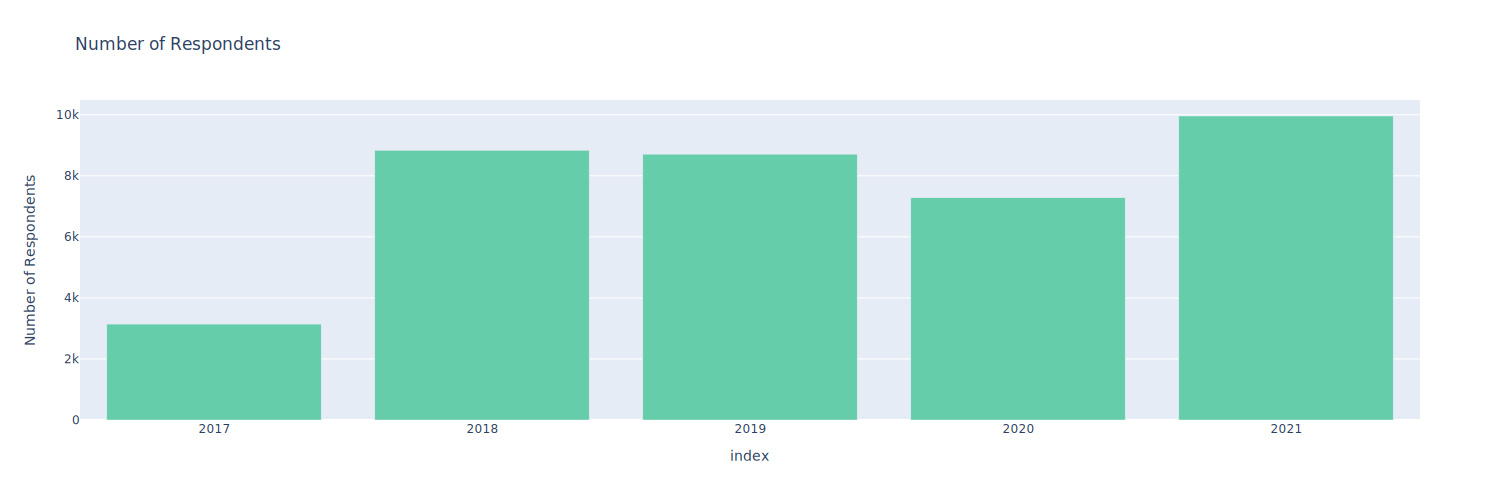

In [23]:
#@title
total_respondents = pd.DataFrame(df_tech.groupby('SurveyYear')['SurveyYear'].count())
fig = px.bar(total_respondents, x=total_respondents.index, y='SurveyYear',  barmode="group",color_discrete_sequence =['mediumaquamarine']*len(total_respondents),
        labels={
        "x": "Survey Year",
        "SurveyYear": "Number of Respondents"
                 },
        title = 'Number of Respondents')
fig.update_layout(
    width=1500,
    height=500,)
fig.show()

Percentage of Respondents by Gender & Year

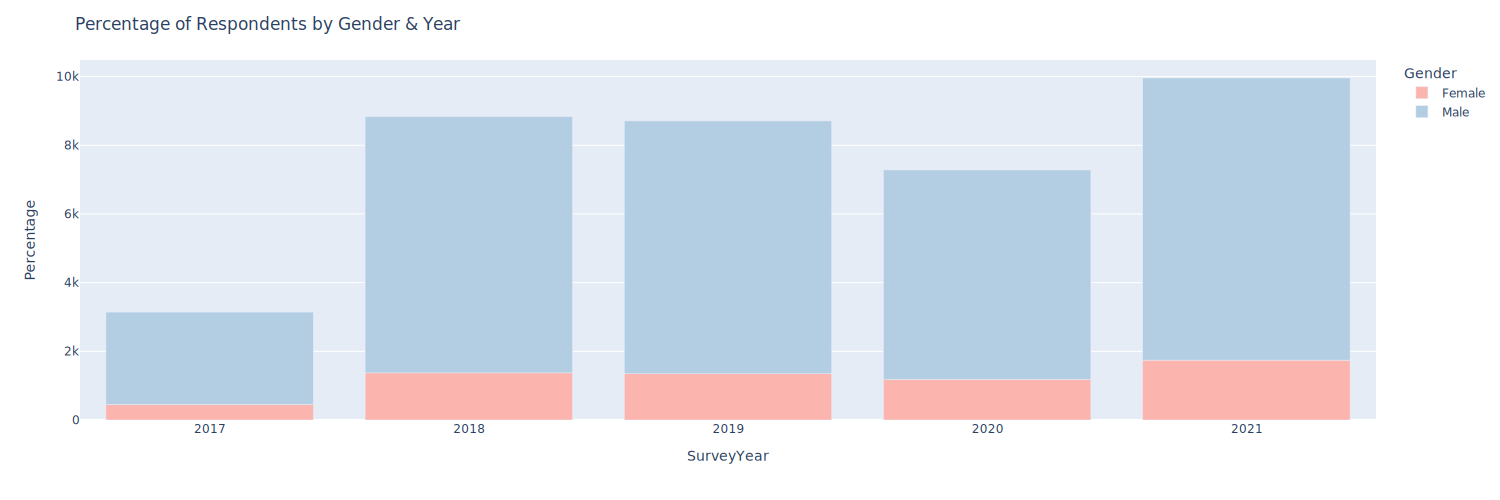

In [24]:
#@title
pct_gender = pd.DataFrame(df_tech.groupby(['SurveyYear','Gender'])['Gender'].count())
pct_gender = pct_gender.rename(columns={"Gender": "Count"}).reset_index()
fig = px.bar(pct_gender, y="Count", x="SurveyYear", color="Gender", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Percentage of Respondents by Gender & Year",
    xaxis_title="SurveyYear",
    yaxis_title="Percentage",
)

fig.update_layout(
    width=1500,
    height=500,)
fig.show()

Distribution of Gender across Age Groups by Year

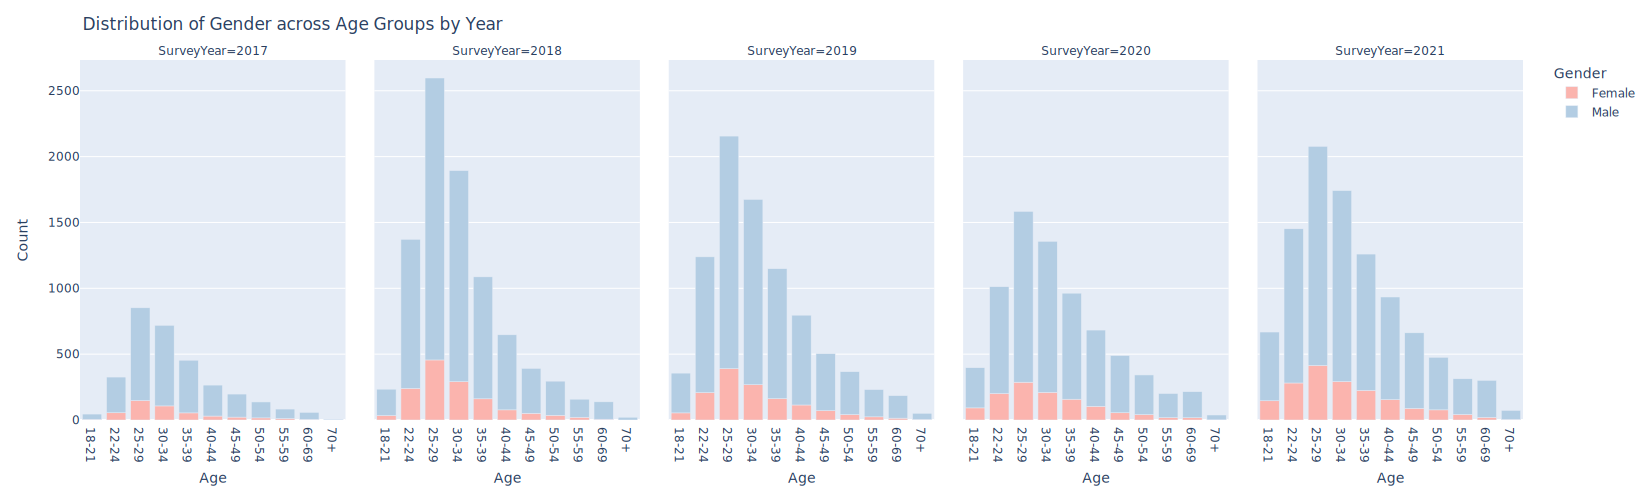

In [30]:
#@title
age_gender = pd.DataFrame(df_tech.groupby(['SurveyYear','Age','Gender']).size()).reset_index()
age_gender.columns = [*age_gender.columns[:-1], 'Count']

fig = px.bar(age_gender, y="Count", x="Age", color="Gender", facet_col="SurveyYear", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of Gender across Age Groups by Year",
    yaxis_title="Count"
)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Distribution of Gender across Countries by Year

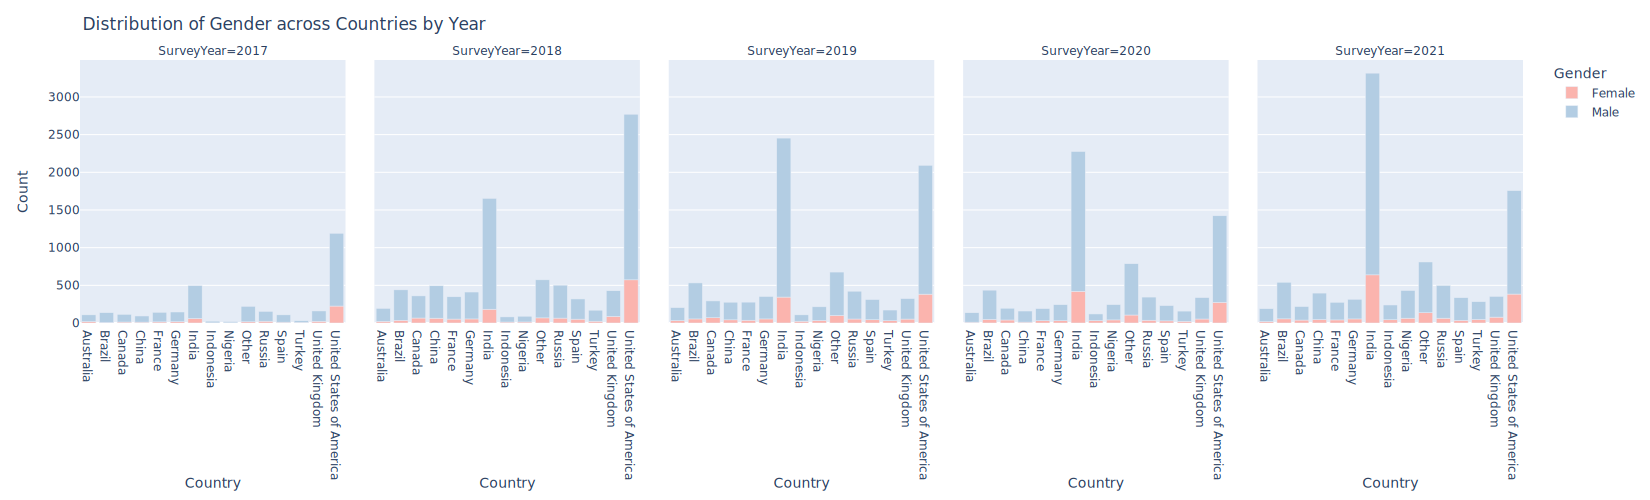

In [29]:
#@title
country = pd.crosstab(df_tech['Country'],df_tech['Gender'])
#country = country.drop('Other')
country = country['Female'].nlargest(15).index

df_tech = df_tech[df_tech.Country.isin(country)]
df_tech = df_tech.sort_values('Gender', ascending=True)

OUTLIER_MULTIPLE = 500000
df_tech = df_tech[df_tech['CompensationAmount_mean'].notna()]
df_tech = df_tech[df_tech['CompensationAmount_mean'] <= OUTLIER_MULTIPLE]

country_gender = pd.DataFrame(df_tech.groupby(['SurveyYear','Country','Gender']).size()).reset_index()
country_gender.columns = [*country_gender.columns[:-1], 'Count']

fig = px.bar(country_gender, y="Count", x="Country", color="Gender", facet_col="SurveyYear", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of Gender across Countries by Year",
    yaxis_title="Count"
)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Distribution of Gender across Education Levels by Year

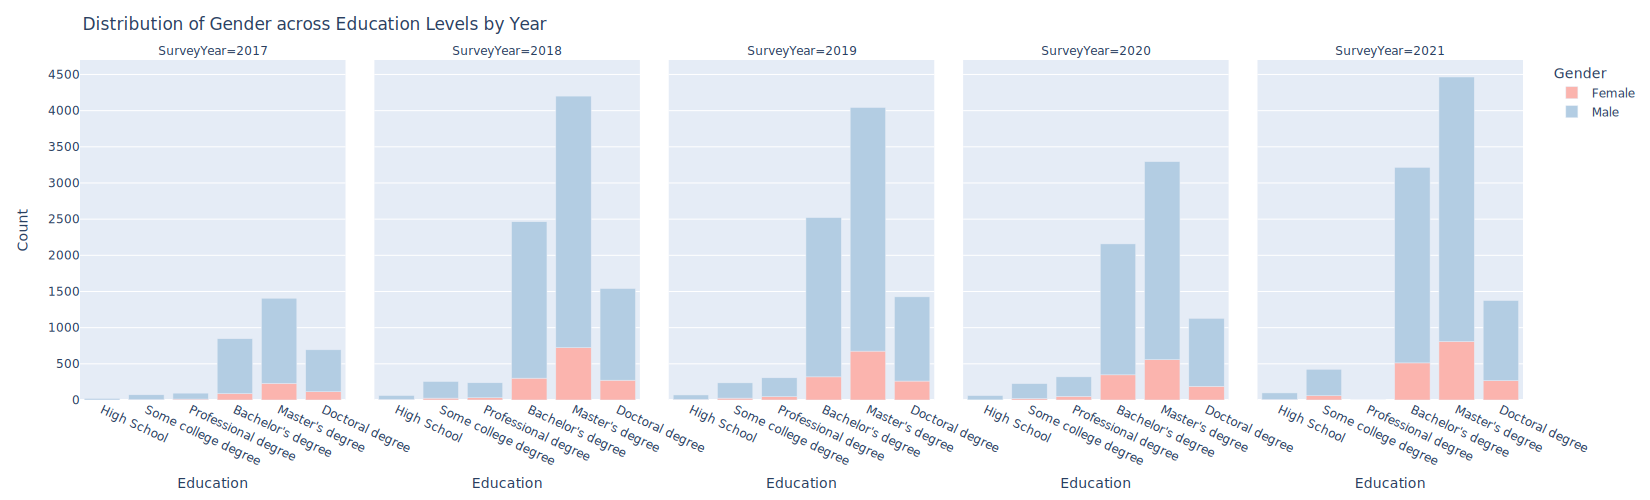

In [31]:
#@title
df_tech = df_tech.replace({"Some college/university study without earning a bachelor's degree":"Some college degree",
                           "No formal education past high school":"High School"})
df_tech["Education"]= pd.Categorical(df_tech["Education"],categories=['High School','Some college degree','Professional degree',"Bachelor's degree","Master's degree","Doctoral degree"],ordered=True)
df_tech = df_tech.sort_values('Education')

edu_gender = pd.DataFrame(df_tech.groupby(['SurveyYear','Education','Gender']).size()).reset_index()
edu_gender.columns = [*edu_gender.columns[:-1], 'Count']

fig = px.bar(edu_gender, y="Count", x="Education", color="Gender", facet_col="SurveyYear", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of Gender across Education Levels by Year",
    yaxis_title="Count"
)
fig.update_xaxes(tickangle=25)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Distribution of Gender across Learning Time by Year

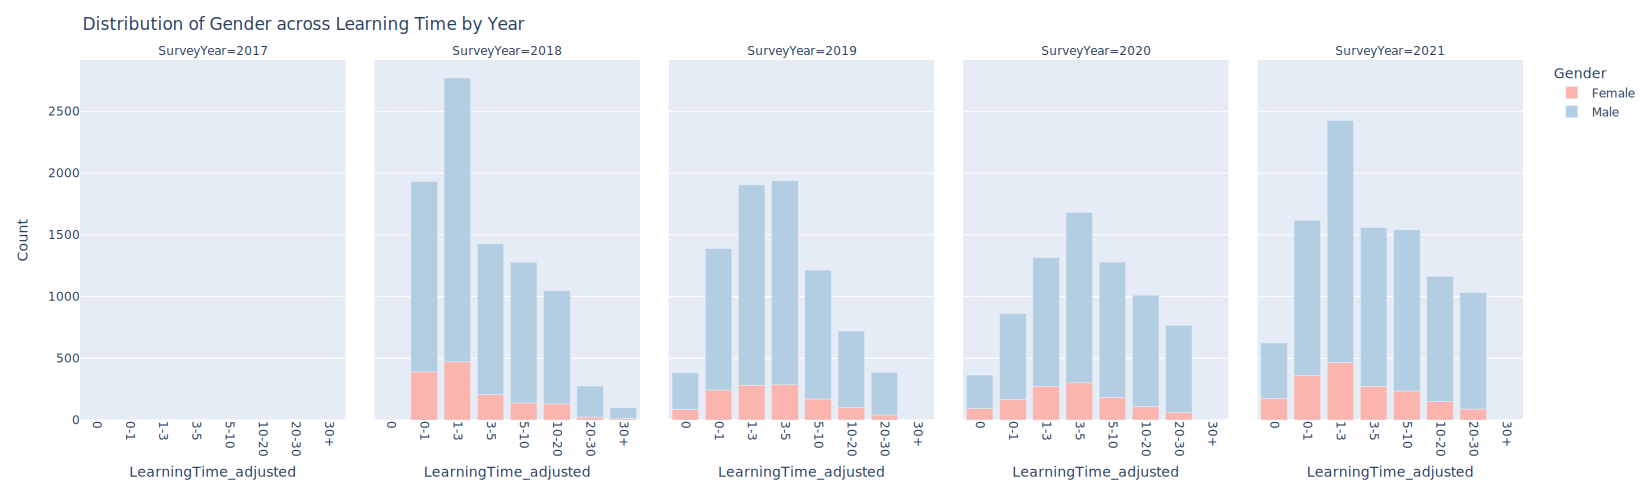

In [32]:
#@title
df_tech['LearningTime_adjusted'] = pd.Categorical(df_tech['LearningTime_adjusted'],categories=['0','0-1','1-3','3-5','5-10','10-20','20-30','30+'],ordered=True)
df_tech = df_tech.sort_values('LearningTime_adjusted',ascending=False)
time_gender = pd.DataFrame(df_tech.groupby(['SurveyYear','LearningTime_adjusted','Gender']).size()).reset_index()
time_gender.columns = [*time_gender.columns[:-1], 'Count']

fig = px.bar(time_gender, y="Count", x="LearningTime_adjusted", color="Gender", facet_col="SurveyYear", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of Gender across Learning Time by Year",
    yaxis_title="Count"
)
fig.update_xaxes(tickangle=90)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Distribution of Gender across Job Titles by Year

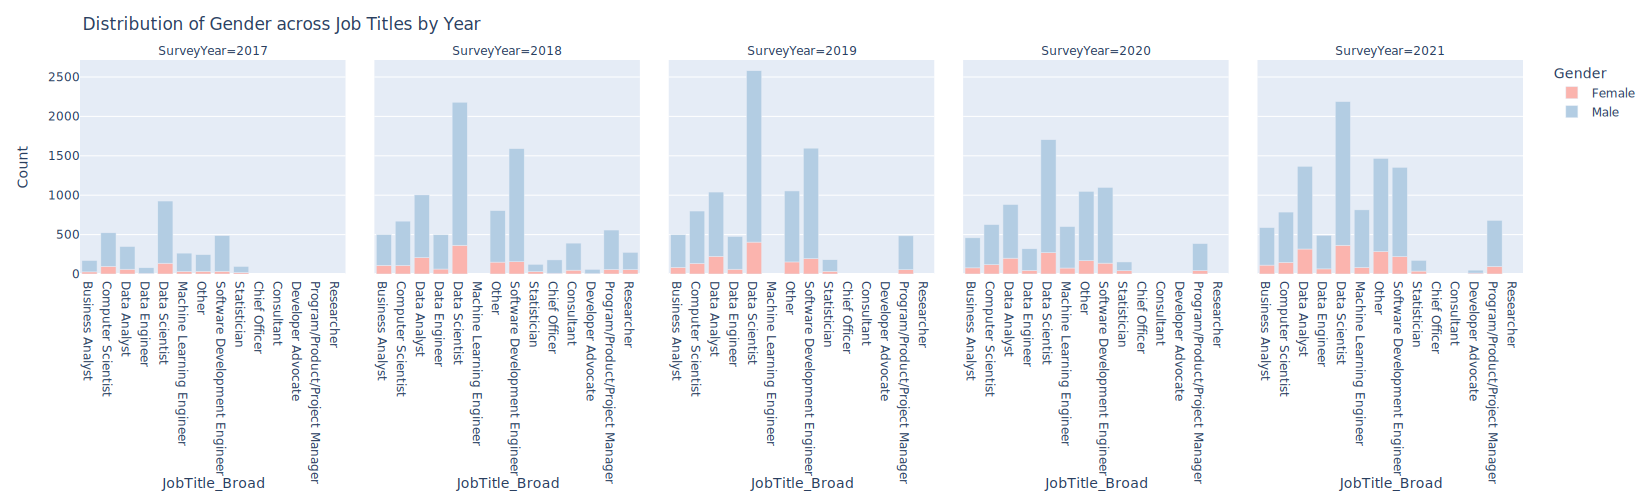

In [33]:
#@title
df_tech = df_tech.sort_values("JobTitle_Broad")
job_gender = pd.DataFrame(df_tech.groupby(['SurveyYear','JobTitle_Broad','Gender']).size()).reset_index()
job_gender.columns = [*job_gender.columns[:-1], 'Count']

fig = px.bar(job_gender, y="Count", x="JobTitle_Broad", color="Gender", facet_col="SurveyYear", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of Gender across Job Titles by Year",
    yaxis_title="Count"
)

fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Distribution of Gender across Employer Industry by Year (2017,2018,2021)

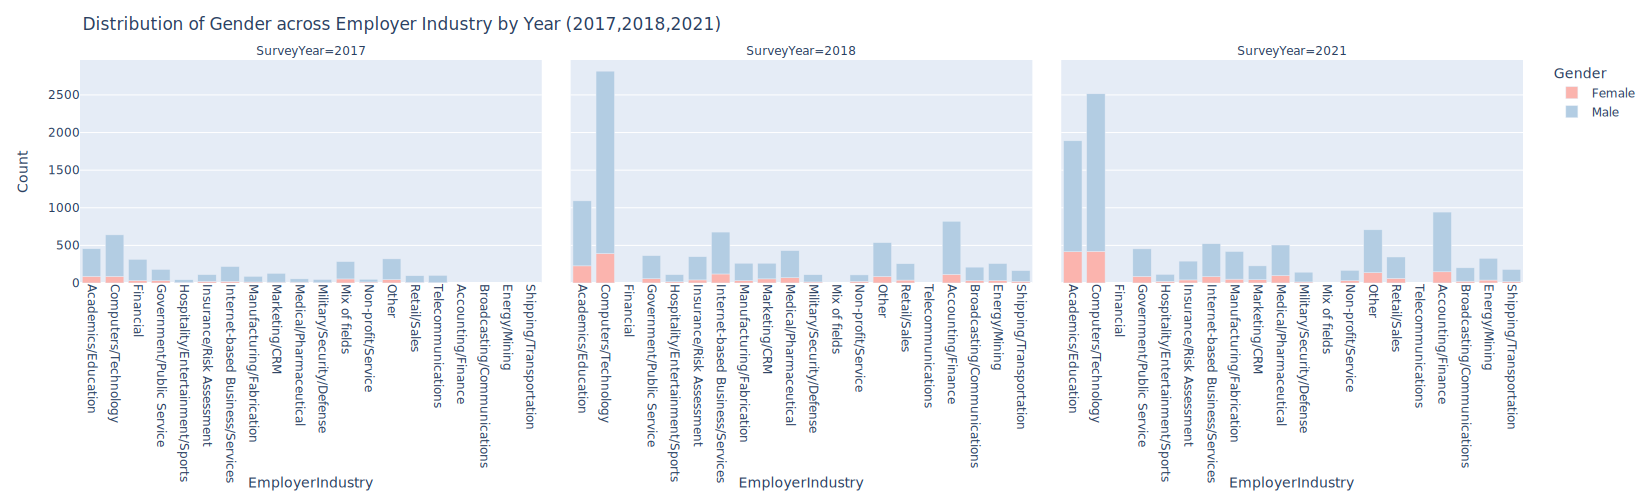

In [34]:
#@title
ind_gender = pd.DataFrame(df_tech.groupby(['SurveyYear','EmployerIndustry','Gender']).size()).reset_index()
ind_gender.columns = [*ind_gender.columns[:-1], 'Count']

fig = px.bar(ind_gender, y="Count", x="EmployerIndustry", color="Gender", facet_col="SurveyYear", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of Gender across Employer Industry by Year (2017,2018,2021)",
    yaxis_title="Count"
)
fig.update_xaxes(tickangle=90)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Distribution of Gender across Employer Size by Year (no data for 2018)

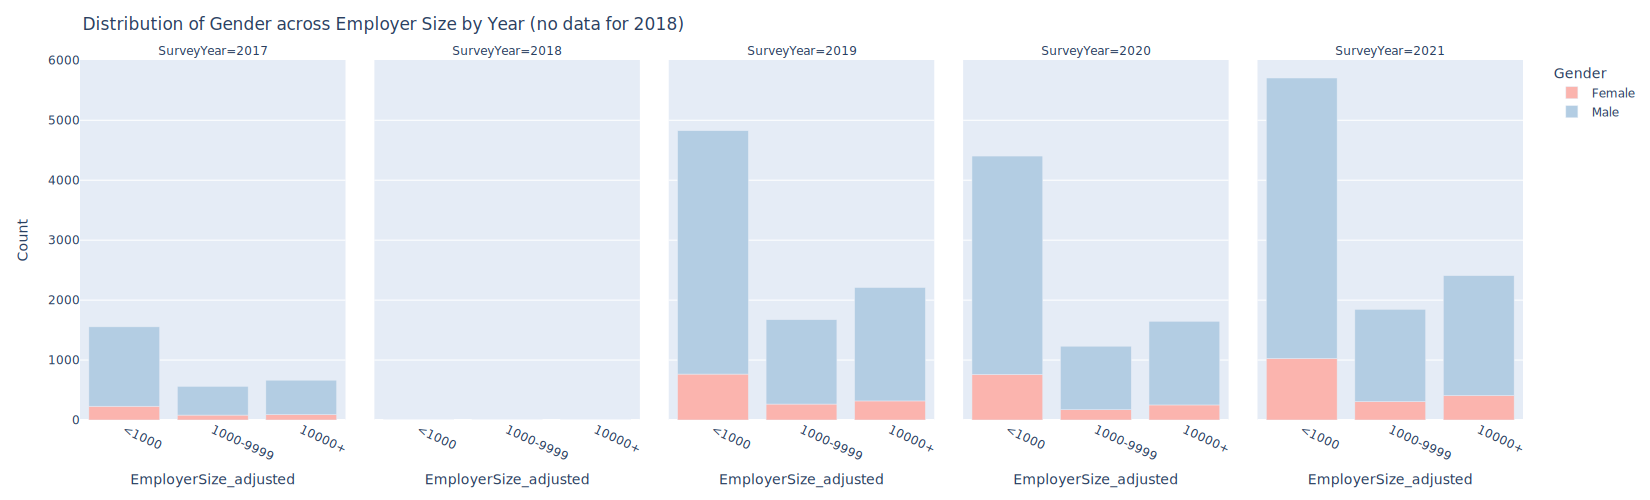

In [35]:
#@title
df_tech['EmployerSize_adjusted'] = pd.Categorical(df_tech['EmployerSize_adjusted'],categories=['<1000','1000-9999','10000+'],ordered=True)
df_tech = df_tech.sort_values(by=['EmployerSize_adjusted','Gender'], ascending=True)
size_gender = pd.DataFrame(df_tech.groupby(['SurveyYear','EmployerSize_adjusted','Gender']).size()).reset_index()
size_gender.columns = [*size_gender.columns[:-1], 'Count']

fig = px.bar(size_gender, y="Count", x="EmployerSize_adjusted", color="Gender", facet_col="SurveyYear", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of Gender across Employer Size by Year (no data for 2018)",
    yaxis_title="Count"
)
fig.update_xaxes(tickangle=25)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

#Sub-Task 4: Investigating the Gender Pay Gap


Distribution of the Yearly Income for Age Groups by Gender (2017 - 2021)

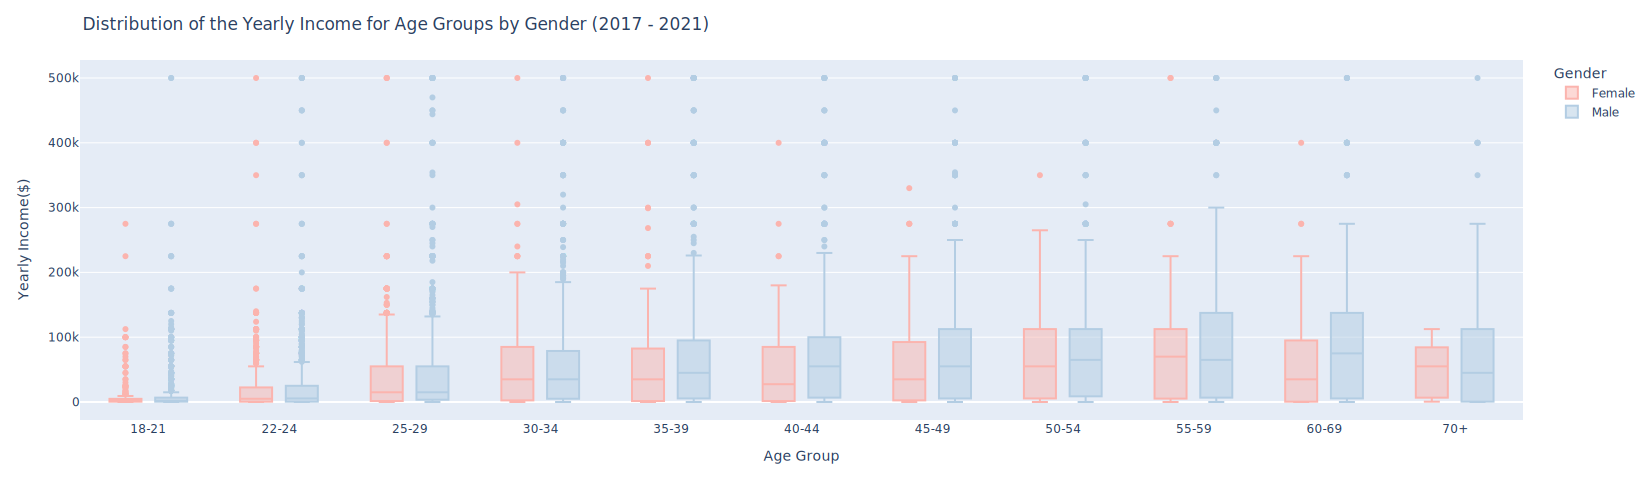

In [36]:
#@title
df_tech = df_tech.sort_values(by=['Gender'], ascending=True)
df_tech = df_tech.sort_values("Age")
OUTLIER_MULTIPLE = 500000
df_tech = df_tech[df_tech['CompensationAmount_mean'].notna()]
df_tech = df_tech[df_tech['CompensationAmount_mean'] <= OUTLIER_MULTIPLE]
fig = px.box(df_tech, x="Age", y="CompensationAmount_mean", color="Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of the Yearly Income for Age Groups by Gender (2017 - 2021)",
    xaxis_title = "Age Group",
    yaxis_title="Yearly Income($)"
)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Distribution of the Yearly Income for Learning Time by Gender (2017 - 2021)

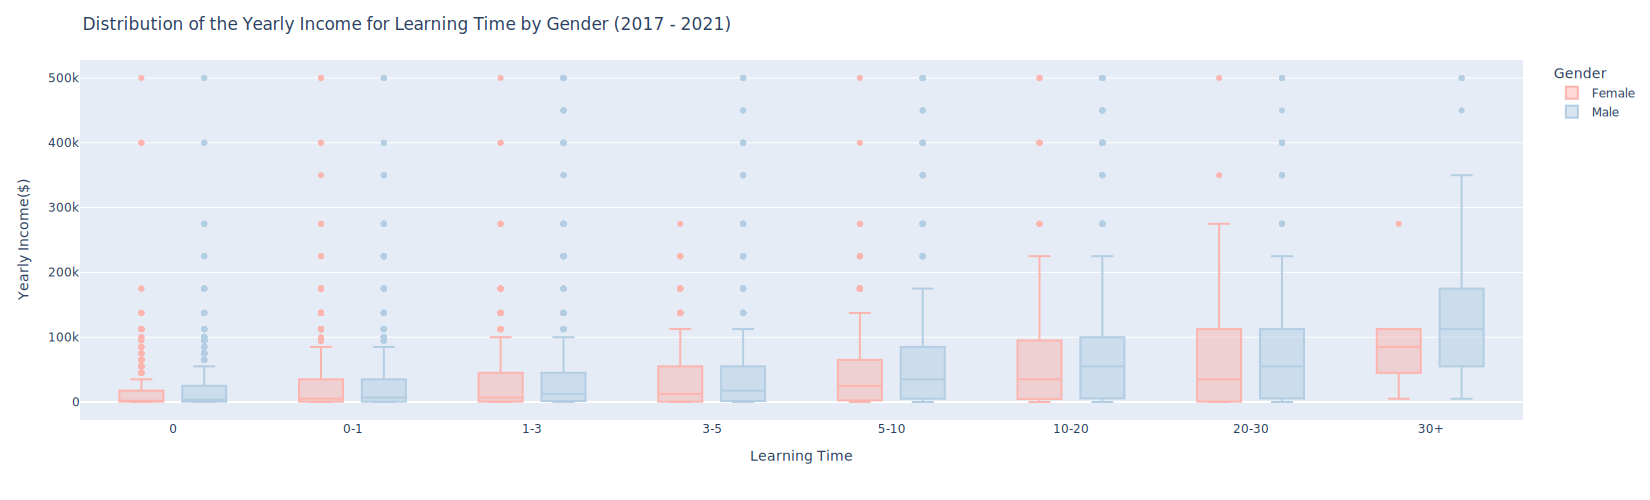

In [37]:
#@title
df_tech = pd.read_csv("df_tech.csv")
df_tech['LearningTime_adjusted'] = pd.Categorical(df_tech['LearningTime_adjusted'],categories=['0','0-1','1-3','3-5','5-10','10-20','20-30','30+'],ordered=True)
df_tech = df_tech.sort_values(by=['LearningTime_adjusted','Gender'], ascending=True)

OUTLIER_MULTIPLE = 500000
df_tech = df_tech[df_tech['CompensationAmount_mean'].notna()]
df_tech = df_tech[df_tech['CompensationAmount_mean'] <= OUTLIER_MULTIPLE]
fig = px.box(df_tech, x="LearningTime_adjusted", y="CompensationAmount_mean", color="Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of the Yearly Income for Learning Time by Gender (2017 - 2021)",
    xaxis_title = "Learning Time",
    yaxis_title="Yearly Income($)"
)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Distribution of the Yearly Income for Education Levels by Gender (2017 - 2021)

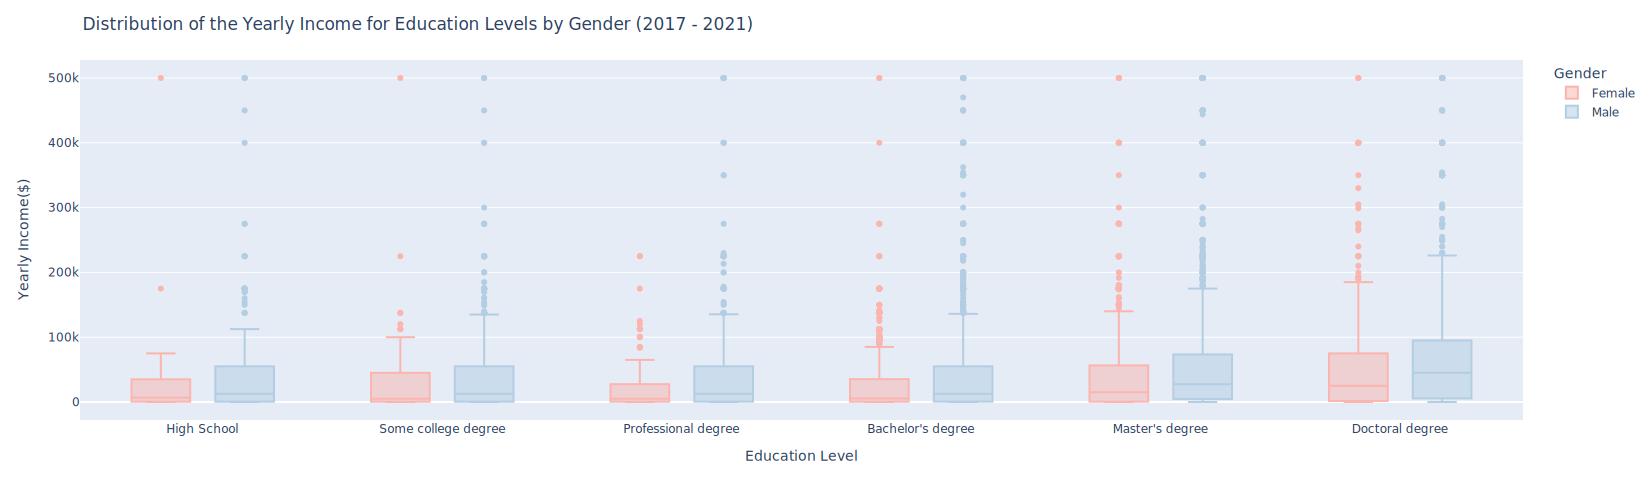

In [38]:
#@title
df_tech = pd.read_csv("df_tech.csv")
df_tech = df_tech.replace({"Some college/university study without earning a bachelor's degree":"Some college degree",
                           "No formal education past high school":"High School"})
df_tech["Education"]= pd.Categorical(df_tech["Education"],categories=['High School','Some college degree','Professional degree',"Bachelor's degree","Master's degree","Doctoral degree"],ordered=True)
df_tech = df_tech.sort_values('Education')

OUTLIER_MULTIPLE = 500000
df_tech = df_tech[df_tech['CompensationAmount_mean'].notna()]
df_tech = df_tech[df_tech['CompensationAmount_mean'] <= OUTLIER_MULTIPLE]
fig = px.box(df_tech, x="Education", y="CompensationAmount_mean", color="Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of the Yearly Income for Education Levels by Gender (2017 - 2021)",
    xaxis_title = "Education Level",
    yaxis_title="Yearly Income($)"
)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Mean Wages Comparison by Survey Year (Man = 1.0)

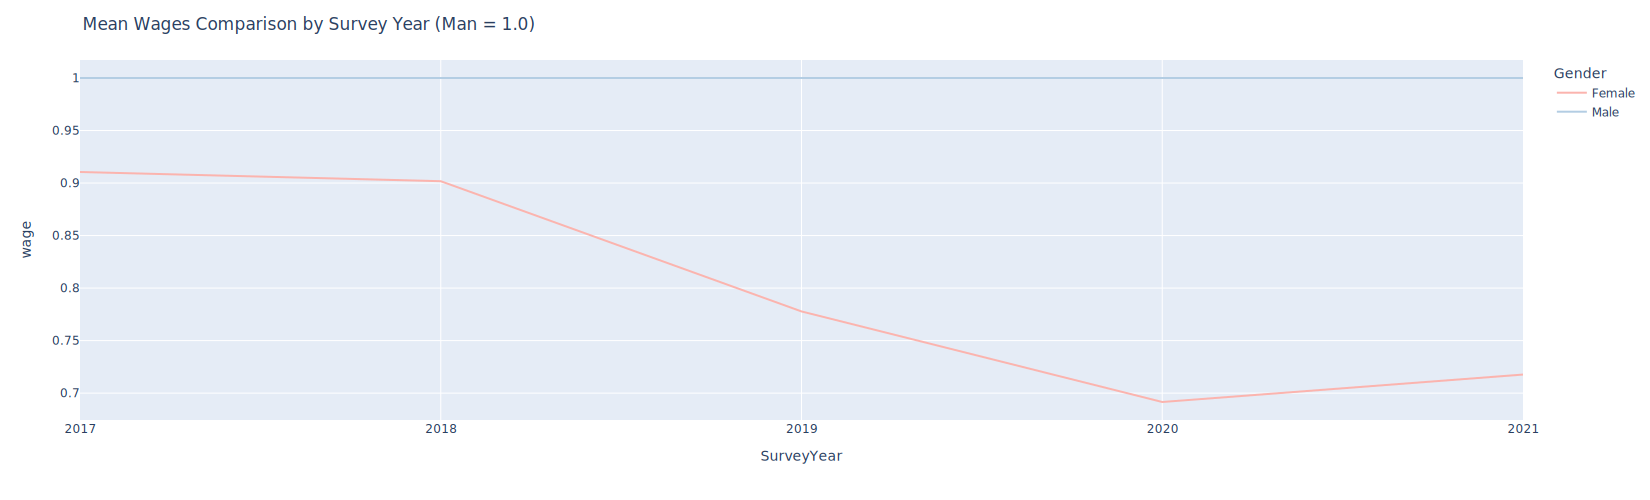

In [39]:
#@title
df_tech = df_tech.sort_values('SurveyYear')
df_tech = df_tech[df_tech['CompensationAmount_mean'].notna()]
OUTLIER_MULTIPLE = 500000

df_tech = df_tech[df_tech['CompensationAmount_mean'] <= OUTLIER_MULTIPLE]

df_tech = df_tech.sort_values('Gender', ascending=True)
gd_mean = df_tech.groupby(['Gender','SurveyYear'])['CompensationAmount_mean'].mean().reset_index().pivot_table(index='SurveyYear',columns='Gender',values='CompensationAmount_mean')


gd_mean['Female'] /= gd_mean['Male']
gd_mean['Male'] = 1

gd_mean = gd_mean.unstack().reset_index().rename(columns = {0:'wage'})


fig = px.line(gd_mean, x="SurveyYear", y="wage", color='Gender',color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Mean Wages Comparison by Survey Year (Man = 1.0)",
)
fig.update_xaxes(type='category')
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

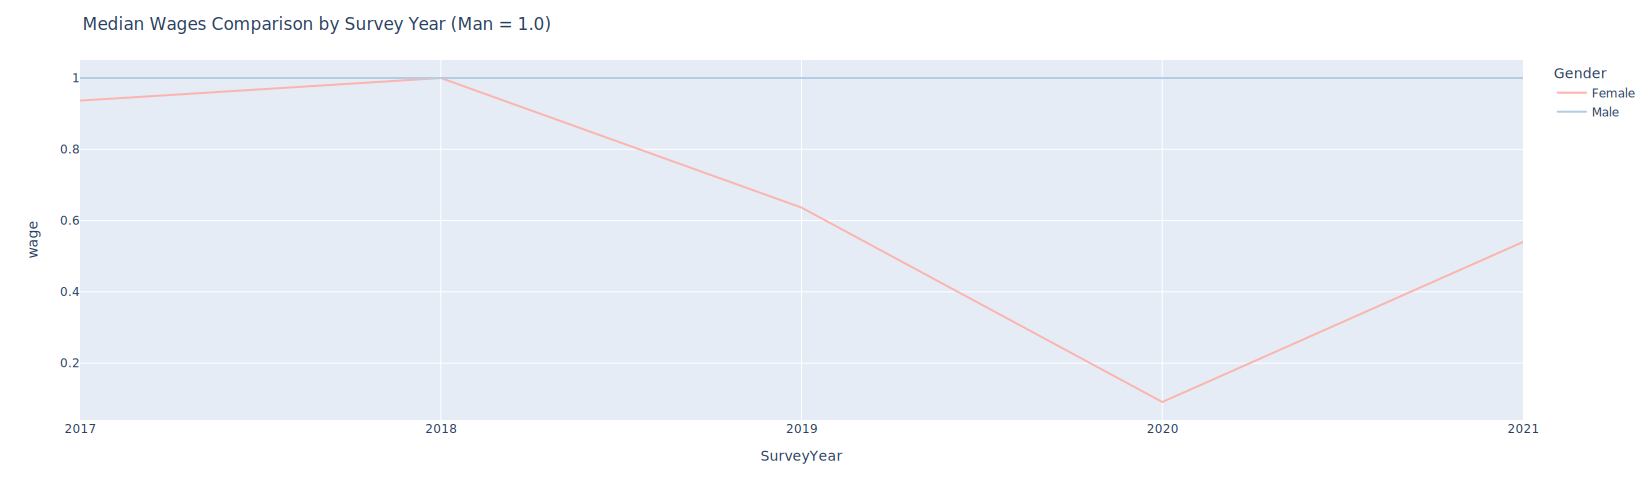

In [40]:
#@title
df_tech = df_tech.sort_values('SurveyYear')
df_tech = df_tech[df_tech['CompensationAmount_mean'].notna()]
OUTLIER_MULTIPLE = 500000

df_tech = df_tech[df_tech['CompensationAmount_mean'] <= OUTLIER_MULTIPLE]

df_tech = df_tech.sort_values('Gender', ascending=True)
gd_median = df_tech.groupby(['Gender','SurveyYear'])['CompensationAmount_mean'].median().reset_index().pivot_table(index='SurveyYear',columns='Gender',values='CompensationAmount_mean')


gd_median['Female'] /= gd_median['Male']
gd_median['Male'] = 1

gd_median = gd_median.unstack().reset_index().rename(columns = {0:'wage'})


fig = px.line(gd_median, x="SurveyYear", y="wage", color='Gender',color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Median Wages Comparison by Survey Year (Man = 1.0)",
)
fig.update_xaxes(type='category')
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Median Wages Comparison by Education Level (Man = 1.0)

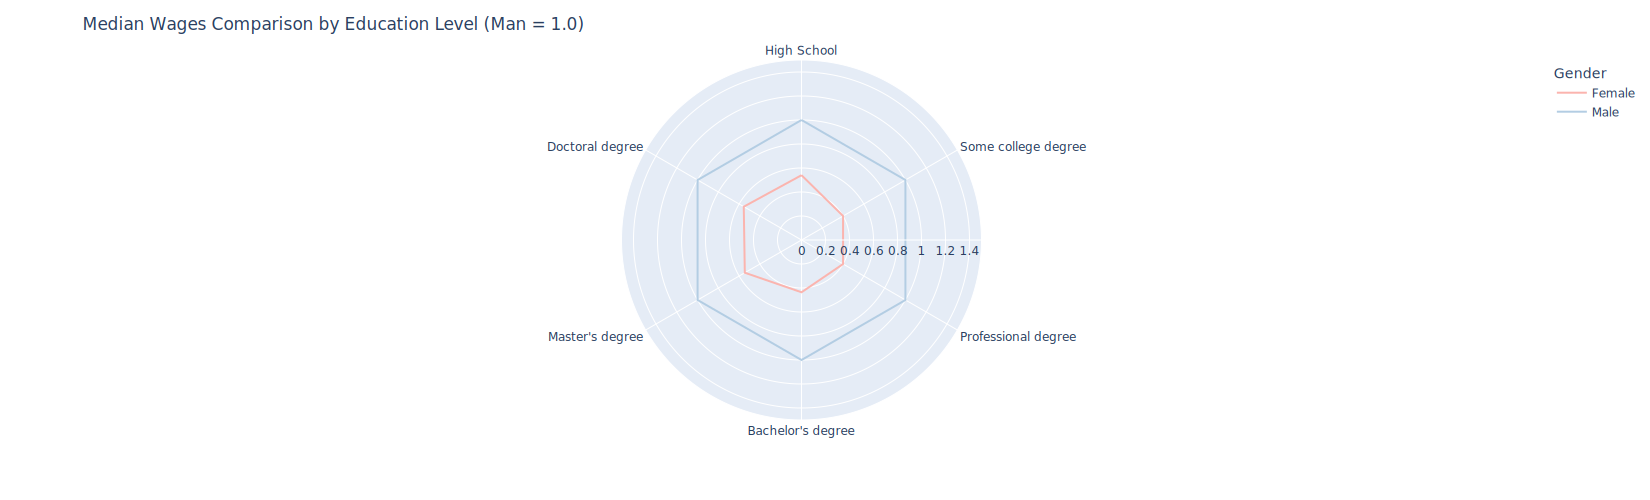

In [41]:
#@title
df_tech = df_tech.replace({"Some college/university study without earning a bachelor's degree":"Some college degree",
                           "No formal education past high school":"High School"})
df_tech["Education"]= pd.Categorical(df_tech["Education"],categories=['High School','Some college degree','Professional degree',"Bachelor's degree","Master's degree","Doctoral degree"],ordered=True)
df_tech = df_tech.sort_values('Education')

df_tech = df_tech.sort_values('Gender', ascending=True)
gd_median = df_tech.groupby(['Gender','Education'])['CompensationAmount_mean'].median().reset_index().pivot_table(index='Education',columns='Gender',values='CompensationAmount_mean')

gd_median['Female'] /= gd_median['Male']
gd_median['Male'] = 1

gd_median = gd_median.unstack().reset_index().rename(columns = {0:'wage'})

fig = px.line_polar(gd_median, r="wage", theta="Education", color="Gender",  line_close=True,color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1.5]
    )),
  showlegend=True
)
fig.update_layout(
    title="Median Wages Comparison by Education Level (Man = 1.0)",
)


fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Distribution of the Yearly Income for Job Titles by Gender (2017 - 2021)

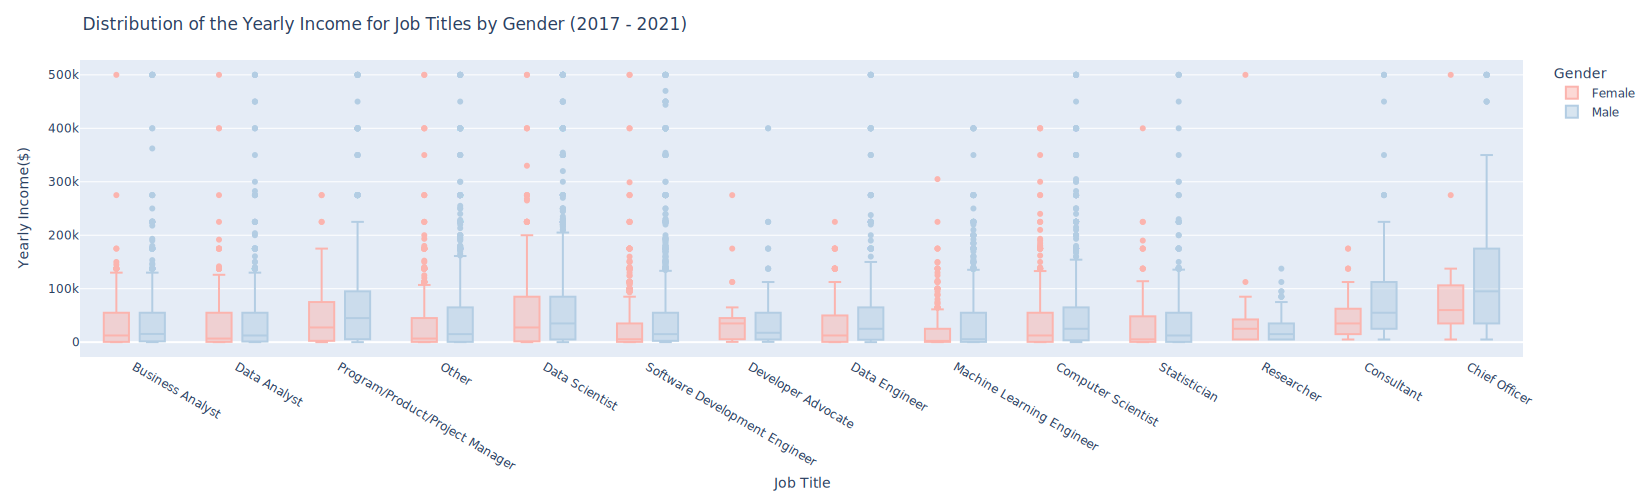

In [42]:
#@title
OUTLIER_MULTIPLE = 500000
df_tech = df_tech[df_tech['CompensationAmount_mean'].notna()]
df_tech = df_tech[df_tech['CompensationAmount_mean'] <= OUTLIER_MULTIPLE]
fig = px.box(df_tech, x="JobTitle_Broad", y="CompensationAmount_mean", color="Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of the Yearly Income for Job Titles by Gender (2017 - 2021)",
    xaxis_title = "Job Title",
    yaxis_title="Yearly Income($)"
)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Median Wages Comparison by Job Titles (Man = 1.0)

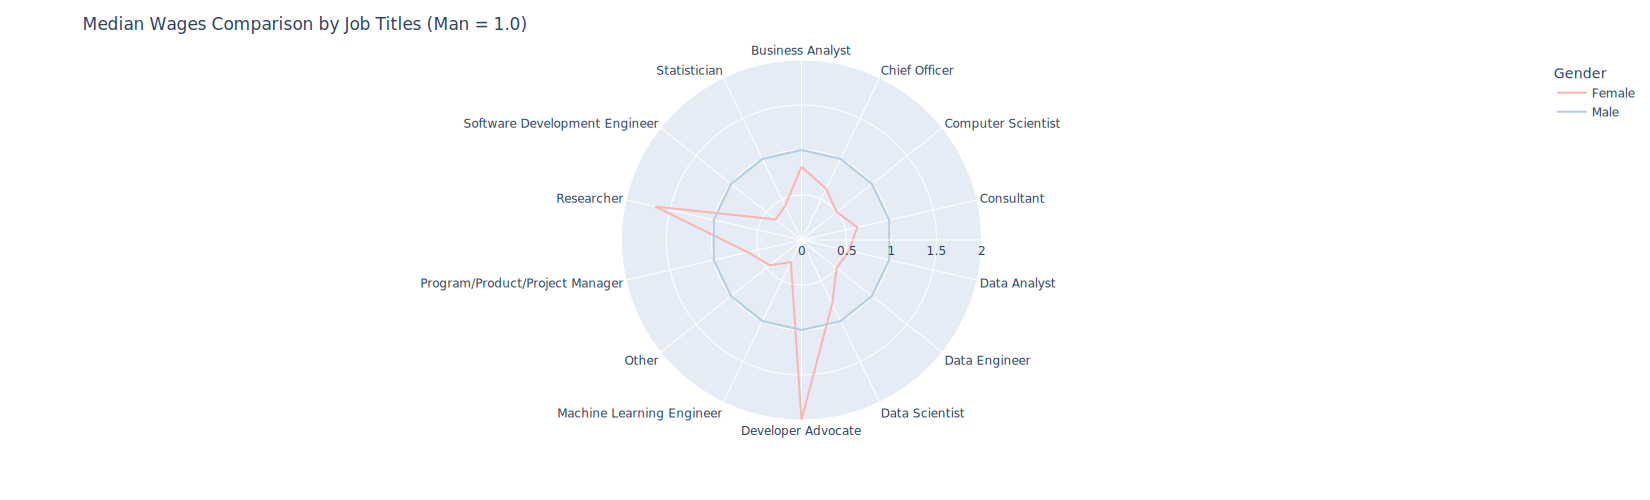

In [43]:
#@title
df_tech = df_tech.sort_values('Gender', ascending=True)
gd_median = df_tech.groupby(['Gender','JobTitle_Broad'])['CompensationAmount_mean'].median().reset_index().pivot_table(index='JobTitle_Broad',columns='Gender',values='CompensationAmount_mean')


gd_median['Female'] /= gd_median['Male']
gd_median['Male'] = 1

gd_median = gd_median.unstack().reset_index().rename(columns = {0:'wage'})

fig = px.line_polar(gd_median, r="wage", theta="JobTitle_Broad", color="Gender",  line_close=True,color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 2]
    )),
  showlegend=True
)
fig.update_layout(
    title="Median Wages Comparison by Job Titles (Man = 1.0)",
)


fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Percentage of Women in Jobs, Sorted by Average Salary

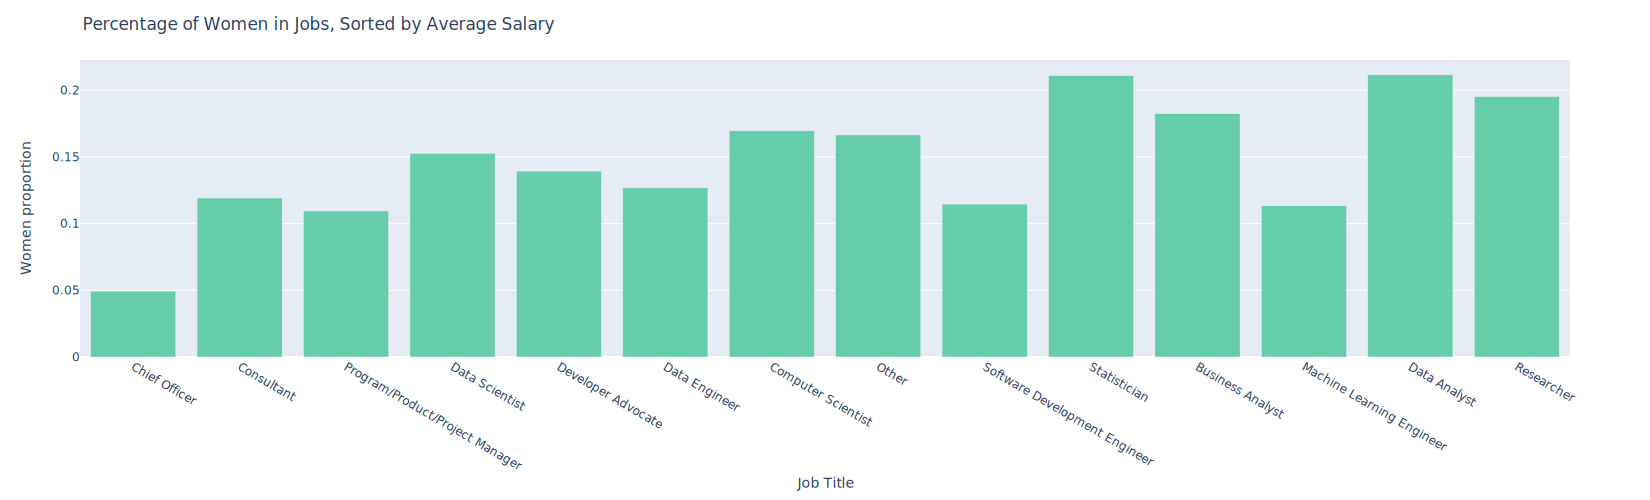

In [44]:
#@title
# Mean salary of each job
means = df_tech.groupby(['JobTitle_Broad'])['CompensationAmount_mean'].mean().sort_values(ascending=False)

# Women proportion of each job
d = {"Female":1, "Male":0}
df_tech['Gender'] = df_tech['Gender'].apply(lambda x: d[x])
women_perc = df_tech.groupby(['JobTitle_Broad'])['Gender'].mean()

# Joining
df_job = pd.concat([means, women_perc], axis=1)

fig = px.bar(df_job, x=df_job.index, y='Gender',color_discrete_sequence =['mediumaquamarine']*len(df_job))
fig.update_layout(
    title="Percentage of Women in Jobs, Sorted by Average Salary",
    xaxis_title = "Job Title",
    yaxis_title="Women proportion"
)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Among all countries, the Higher Earning the Job, the fewer Women

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



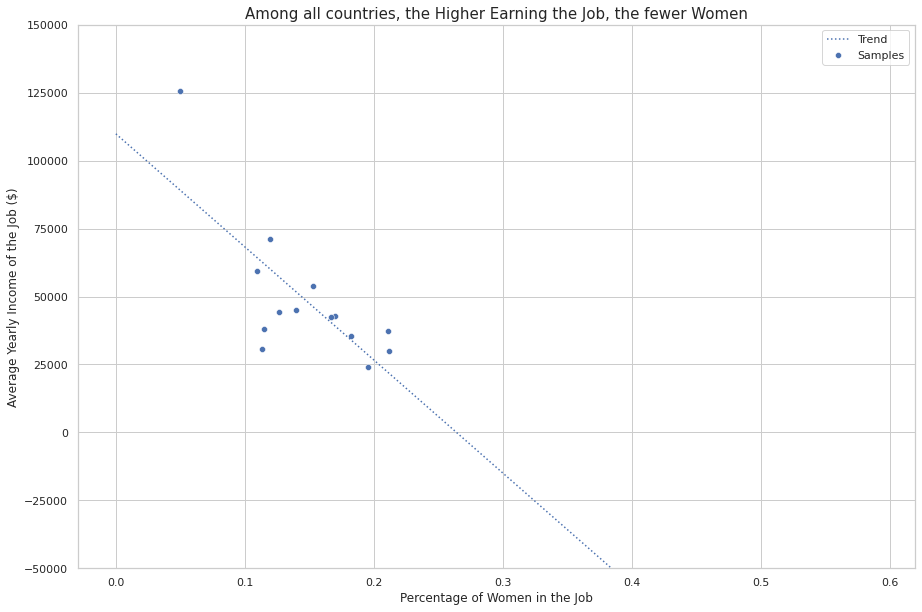

In [45]:
#@title
z = np.polyfit(df_job['Gender'], df_job['CompensationAmount_mean'], 1)
p = np.poly1d(z)

plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
sns.scatterplot(df_job['Gender'], df_job['CompensationAmount_mean'], label='Samples',palette = "GnBu")
plt.plot(np.arange(0, 0.6, 0.01), p(np.arange(0, 0.6, 0.01)), linestyle=':', label='Trend')
plt.ylabel("Average Yearly Income of the Job ($)", fontsize=12)
plt.xlabel("Percentage of Women in the Job", fontsize=12)
plt.title("Among all countries, the Higher Earning the Job, the fewer Women", fontsize=15)
plt.ylim(-50000,150000)
plt.legend()
plt.show()

Distribution of the Yearly Income for Employer Industry by Gender (2017, 2018, 2021)

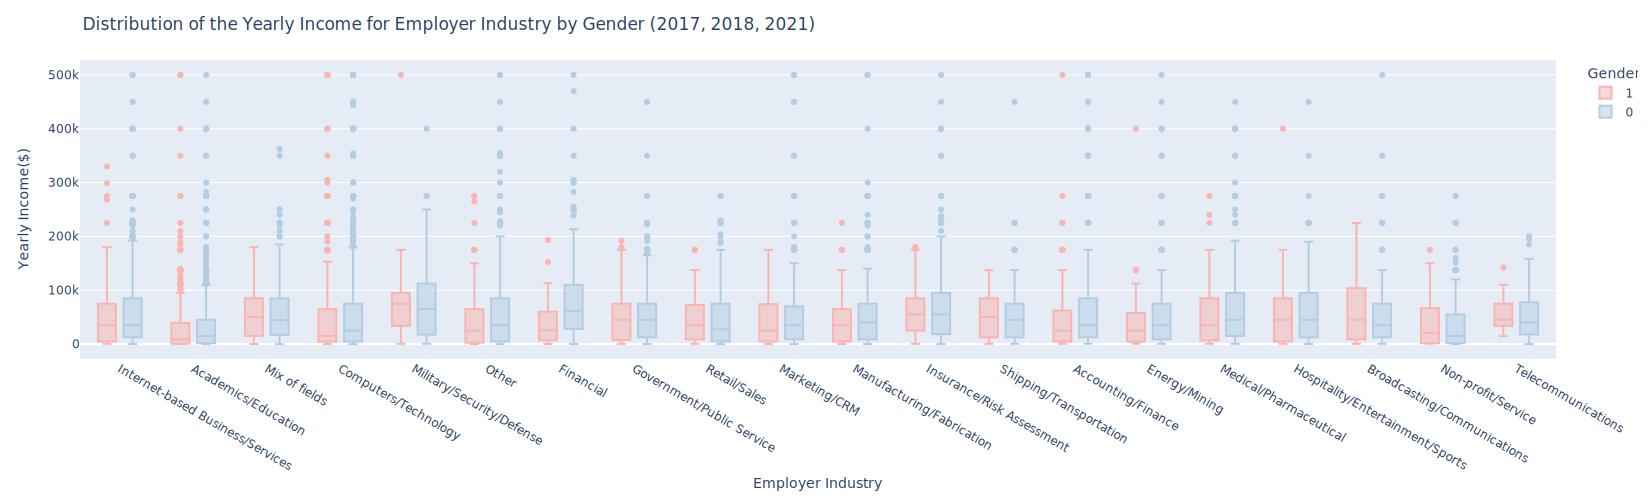

In [47]:
#@title
OUTLIER_MULTIPLE = 500000
df_tech = df_tech[df_tech['CompensationAmount_mean'].notna()]
df_tech = df_tech[df_tech['CompensationAmount_mean'] <= OUTLIER_MULTIPLE]
fig = px.box(df_tech, x="EmployerIndustry", y="CompensationAmount_mean", color="Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of the Yearly Income for Employer Industry by Gender (2017, 2018, 2021)",
    xaxis_title = "Employer Industry",
    yaxis_title="Yearly Income($)"
)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

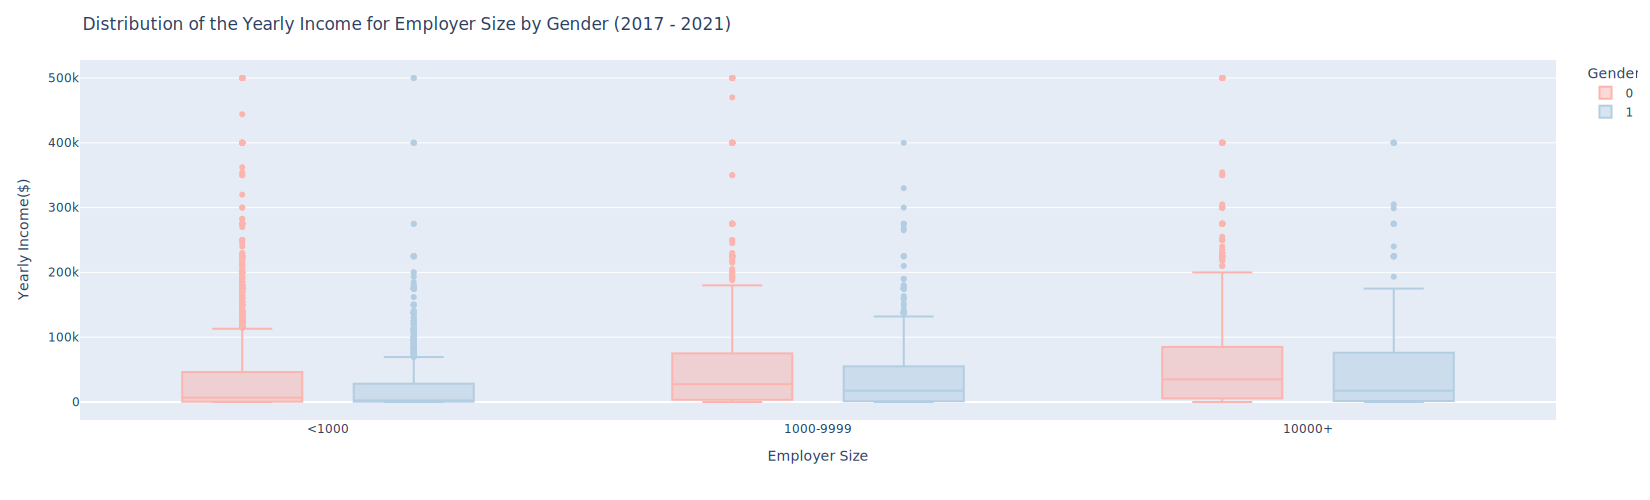

In [48]:
#@title
df_tech['EmployerSize_adjusted'] = pd.Categorical(df_tech['EmployerSize_adjusted'],categories=['<1000','1000-9999','10000+'],ordered=True)
df_tech = df_tech.sort_values(by=['EmployerSize_adjusted','Gender'], ascending=True)

OUTLIER_MULTIPLE = 500000
df_tech = df_tech[df_tech['CompensationAmount_mean'].notna()]
df_tech = df_tech[df_tech['CompensationAmount_mean'] <= OUTLIER_MULTIPLE]
fig = px.box(df_tech, x="EmployerSize_adjusted", y="CompensationAmount_mean", color="Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of the Yearly Income for Employer Size by Gender (2017 - 2021)",
    xaxis_title = "Employer Size",
    yaxis_title="Yearly Income($)"
)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Distribution of the Yearly Income for Countries by Gender (2017 - 2021)

In [134]:
df_tech['Gender']

0        Female
1          Male
2          Male
3          Male
4          Male
          ...  
76675      Male
76676      Male
76677      Male
76678      Male
76679      Male
Name: Gender, Length: 76680, dtype: object

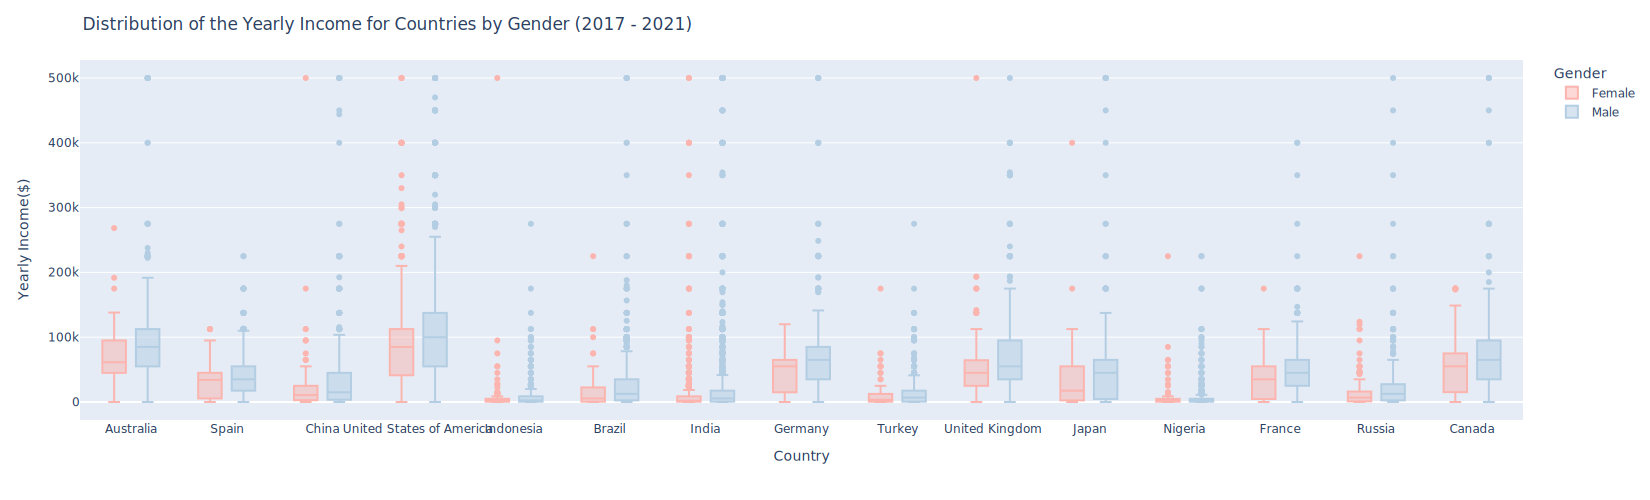

In [135]:
#@title
df_tech = pd.read_csv('df_tech.csv')
country = pd.crosstab(df_tech['Country'],df_tech['Gender'])
country = country.drop('Other')
country = country['Female'].nlargest(15).index

df_tech = df_tech[df_tech.Country.isin(country)]
df_tech = df_tech.sort_values('Gender', ascending=True)

OUTLIER_MULTIPLE = 500000
df_tech = df_tech[df_tech['CompensationAmount_mean'].notna()]
df_tech = df_tech[df_tech['CompensationAmount_mean'] <= OUTLIER_MULTIPLE]


fig = px.box(df_tech, x="Country", y="CompensationAmount_mean", color="Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title="Distribution of the Yearly Income for Countries by Gender (2017 - 2021)",
    xaxis_title = "Country",
    yaxis_title="Yearly Income($)"
)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Median Wage Comparison by Country

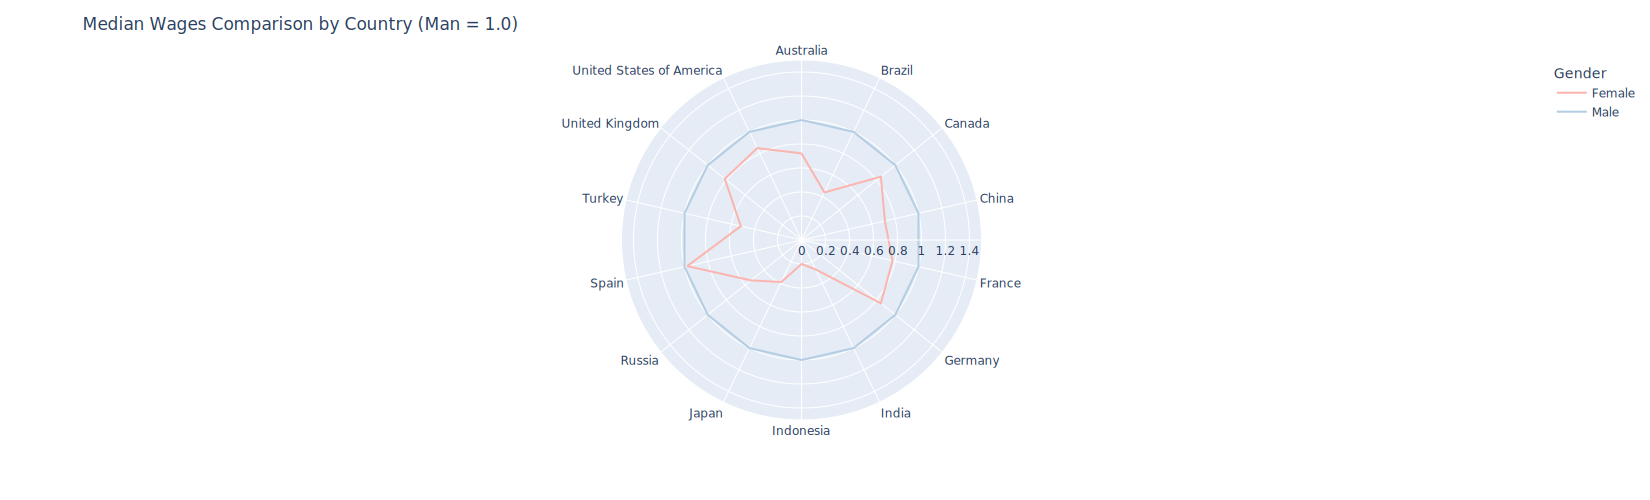

In [50]:
#@title
df_tech = pd.read_csv("df_tech.csv")
country = pd.crosstab(df_tech['Country'],df_tech['Gender'])
country = country.drop('Other')
country = country['Female'].nlargest(15).index

df_tech = df_tech[df_tech.Country.isin(country)]
df_tech = df_tech.sort_values('Gender', ascending=True)
gd_median = df_tech.groupby(['Gender','Country'])['CompensationAmount_mean'].median().reset_index().pivot_table(index='Country',columns='Gender',values='CompensationAmount_mean')
drop_countries = gd_median.index[gd_median.max(axis=1) <= 1500]
gd_median = gd_median[~gd_median.index.isin(drop_countries)]

gd_median['Female'] /= gd_median['Male']
gd_median['Male'] = 1

gd_median = gd_median.unstack().reset_index().rename(columns = {0:'wage'})

fig = px.line_polar(gd_median, r="wage", theta="Country", color="Gender",  line_close=True,color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1.5]
    )),
  showlegend=True
)
fig.update_layout(
    title="Median Wages Comparison by Country (Man = 1.0)",
)


fig.update_layout(
    width=1650,
    height=500,)
fig.show()

#Sub-Task 5: Examining the Gender Pay Gap by Country
###Use 2021 dataset as an example

We are mainly using the 2021 data to see how education, country, jobtitle and other variables affect gender pay gap. 
Then we will use the five-year gender pay gap index to explore the changes.

In [101]:
#@title
#we are mainly using the 2021 data to see how education, country, jobtitle and other variables affect gender pay gap. 
#Then we will use the five-year gender pay gap index to explore the changes
df = pd.read_csv('cleaned_df2021.csv')
#to better perform regreesion, we drop countries which have fewer than 20 female respondents
country = pd.crosstab(df['Country'],df['Gender'])
country = country[country['Female'] >= 20].index
country = country.drop('Other')
df = df[df.Country.isin(country)]

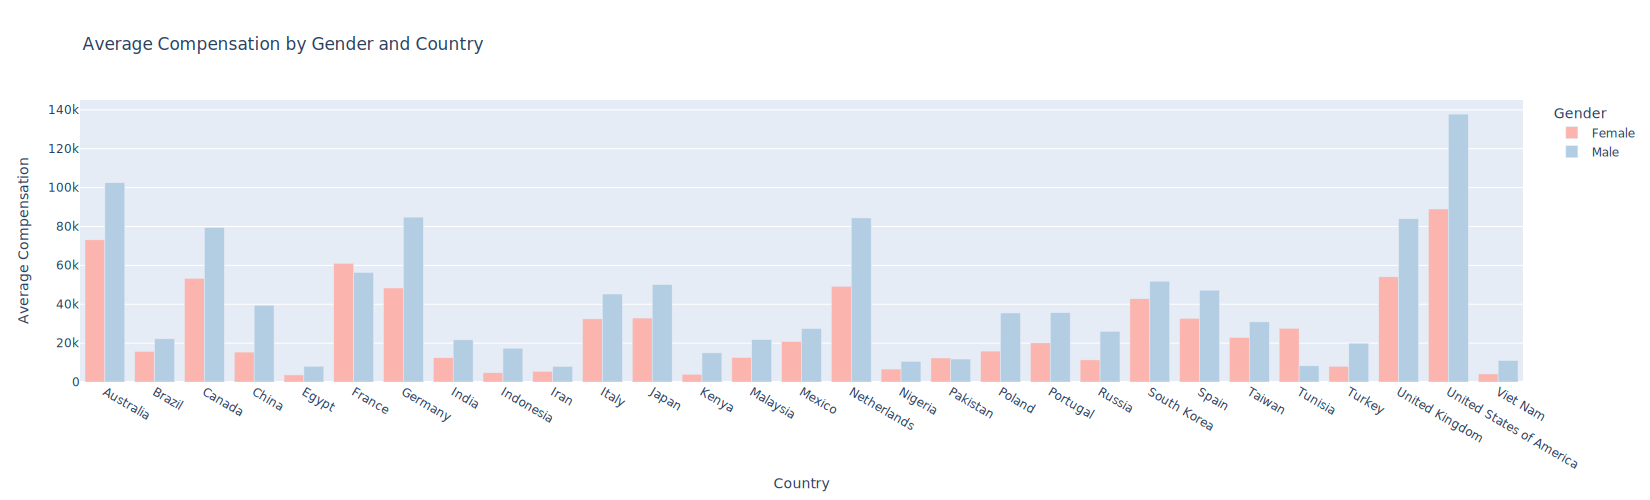

In [95]:
#@title
#to plot the mean wage for each country by gender
country_gender_mean = pd.DataFrame(df.groupby(['Country','Gender'])['CompensationAmount_mean'].mean()).reset_index()
fig = px.bar(country_gender_mean, x='Country', y='CompensationAmount_mean', color = 'Gender', barmode="group",
       color_discrete_sequence=px.colors.qualitative.Pastel1,
        labels={
        "CompensationAmount_mean": "Average Compensation",
        "Country": "Country",
        "Gender": "Gender"
                 },
        title = 'Average Compensation by Gender and Country   <br><sup>In most countries in our dataset, men have higher average compensation than women. <br>In France, Pakistan & Tunisia, women have higher average compensation than men.</sup>')
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

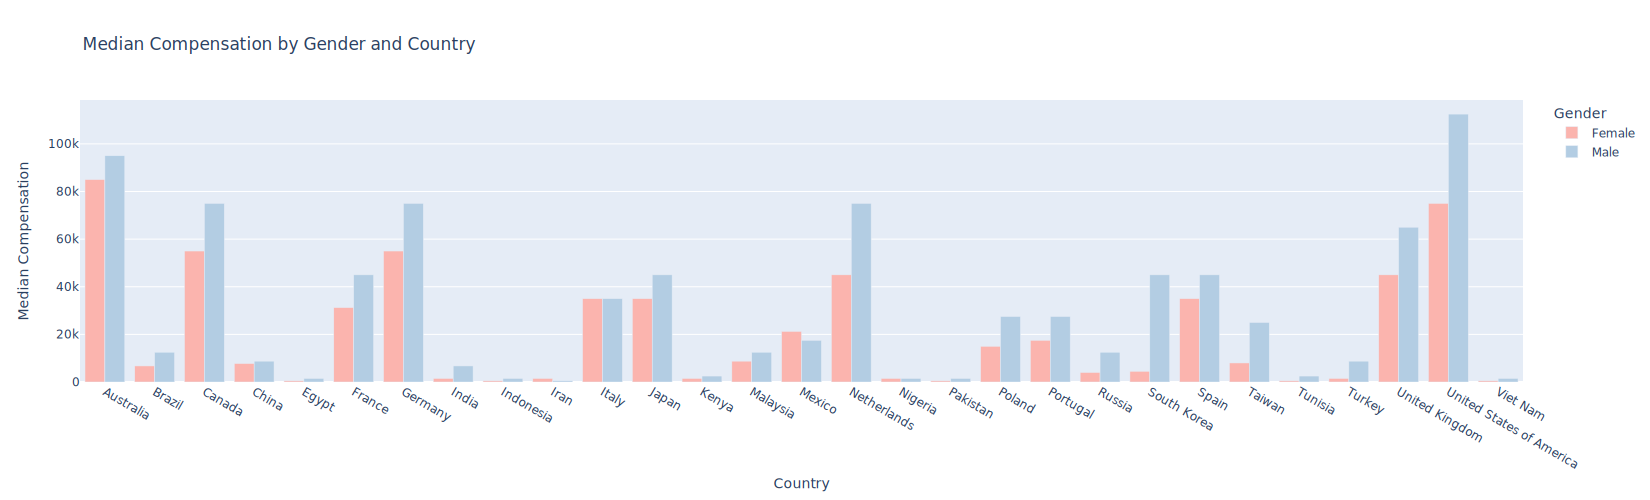

In [96]:
#@title
#the trend is similar
country_gender_median = pd.DataFrame(df.groupby(['Country','Gender'])['CompensationAmount_mean'].median()).reset_index()
fig = px.bar(country_gender_median, x='Country', y='CompensationAmount_mean', color = 'Gender', barmode="group",
       color_discrete_sequence=px.colors.qualitative.Pastel1,
        labels={
        "CompensationAmount_mean": "Median Compensation",
        "Country": "Country",
        "Gender": "Gender"
                 },
        title = 'Median Compensation by Gender and Country <br><sup>The overall trend of median compensation by gender is similar to the average one. In Mexico, women have higher median compensation than men. <br>In Italy, women and men have the same median compensation. In Tunisia, the median is way lower than the average, suggesting the existance of extremely high income reported. </sup>')
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

In [62]:
#@title
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from itertools import cycle

In [102]:
#@title
#to get the adjusted wage by centering the wage to the median to reduce multicollinearity in a regression model
OUTLIER_MULTIPLE = 10
df['median_wage'] = df['Country'].map(df.groupby('Country')['CompensationAmount_mean'].median())
df['adj_wage'] = df['CompensationAmount_mean'] / df['median_wage']
df = df[df['adj_wage'] <= OUTLIER_MULTIPLE]

#df = df.dropna()
TARGET = ['adj_wage']
EXPLANATORY = ['Gender'] #gender
CONTROL = ['Age_mean','LearningTime_mean','EmployerSize_mean','Education','Country','EmployerIndustry','JobTitle_Broad']

df['gender_country'] = df['Gender'] + df['Country']
by_country = pd.get_dummies(df['gender_country'])
by_country = by_country[[col for col in by_country.columns if 'Female' in col]]

y = df[TARGET]

#woman not by country
X_total = pd.concat([pd.get_dummies(df[EXPLANATORY + CONTROL],drop_first=True)],axis=1)

model = sm.OLS(y,sm.add_constant(X_total))
results = model.fit()
result_total = pd.concat([results.params,results.bse],axis=1)

result_total = pd.DataFrame(result_total).T
result_total#.columns = ['coef','se']
#result_total.index = ['Overall']

X = pd.concat([by_country,pd.get_dummies(df[CONTROL],drop_first=True)],axis=1)
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
#results.summary()

WOMAN_INDEX = [i for i in results.params.index if 'Female' in i]
result = pd.concat([results.params,results.bse],axis=1).loc[WOMAN_INDEX]

result.columns = ['coef','se']
result.index = [i.replace('Female','') for i in result.index]

result = pd.concat([result_total,result])
result = result.sort_values('coef')
result.drop(result.tail(2).index,inplace=True) 
result = result[['coef','se']]
result["year"] = 2021

result2021 = result.reset_index()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



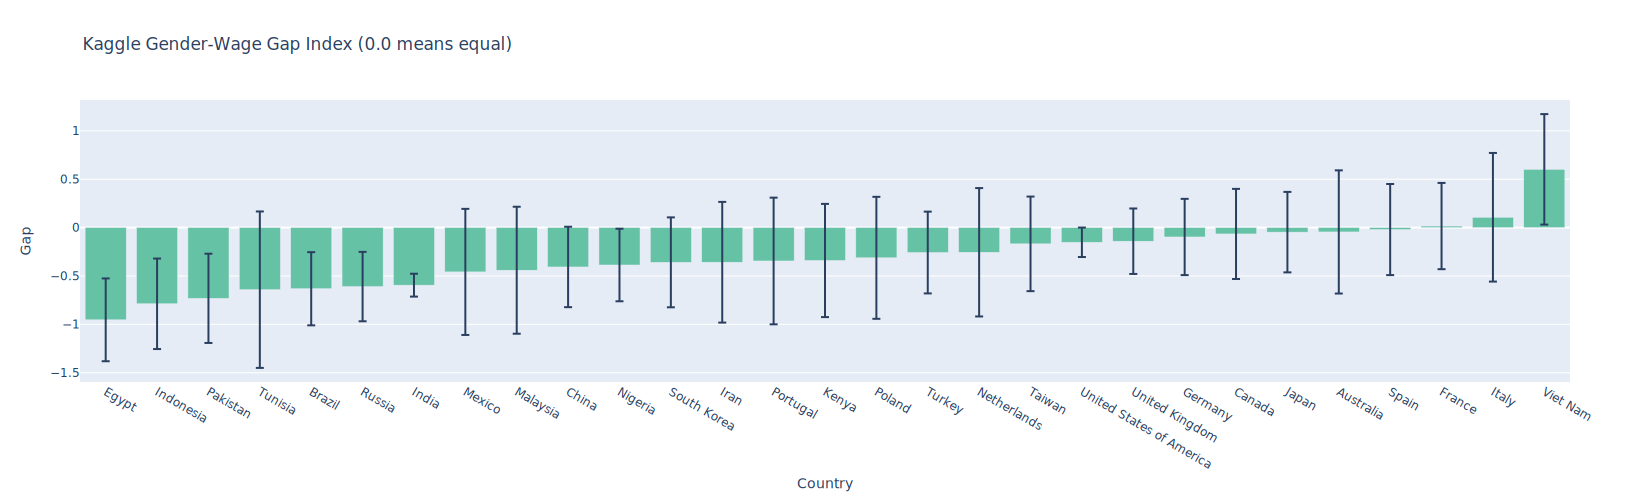

In [103]:
#@title
palette = cycle(px.colors.qualitative.Set2)
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Estimated Wage Gap by Gender',
    marker_color=next(palette),
    x = result.index, y=result.coef,
    error_y=dict(type='data', array=result.se*1.645)
))

fig.update_layout(barmode='group')

fig.update_layout(
    title="Kaggle Gender-Wage Gap Index (0.0 means equal)",
    xaxis_title="Country",
    yaxis_title="Gap"
)
fig.update_layout(
    width=1650,
    height=500,)
fig.show()

To better compare the data, we ran a regression on the gender pay gap among the countries that have more than 20 female respondents. The dataset has a total of 13,577 qualified respondents from 29 countries. As we want to see how the gender pay gap is deviant from the median wage (average wage can sometimes be very deceiving for too high or too low values), we centered the compensation to the median value to avoid multicollinearity. The controlled variables are age, education level, country, job title(profession), learning time(experience), employer industry and employer size.

The bar and error bar chart above shows the estimated “gender-wage gap”, and we call it “Kaggle Gender-Wage Gap Index”.The bar chart indicates the gender pay gap. A negative value means that women earn lower wages than men by the coefficient times 100 percent. Error bars show the estimation error (1.645 times standard deviations, 90% confidence level). If error bars cross zero, that means it is not statistically significant.

Overall is estimated 0.3-ish and statistically significant. This indicates the existence of a global level gender wage gap. Based on the result, women's wages are lower by around 30% of median wage than men after controlling for other factors such as education, experience, job title, and industry.

Indonesia, South Korea, Brazil and India have the largest wage gaps and these gaps are statistically significant. Women's wages are lower than men's by 50% of the median wage. Wage gaps in Taiwan, Egypt, Russia and the United States are also statistically significant, ranging from 20% to 40%.

Portugal, Poland, Vietnam, Netherlands, China, Turkey, Pakistan, Germany, United Kingdom, Spain, Japan, Tunisia, Canada, France, Australia & Italy have wage gaps as well but the gaps are not statistically significant. So, it cannot be said that the gender gaps are systematic in these countries.

Kenya, Malaysia, Mexico, Nigeria & Iran do not have a wage gap, but the results are also far from being statistically significant.


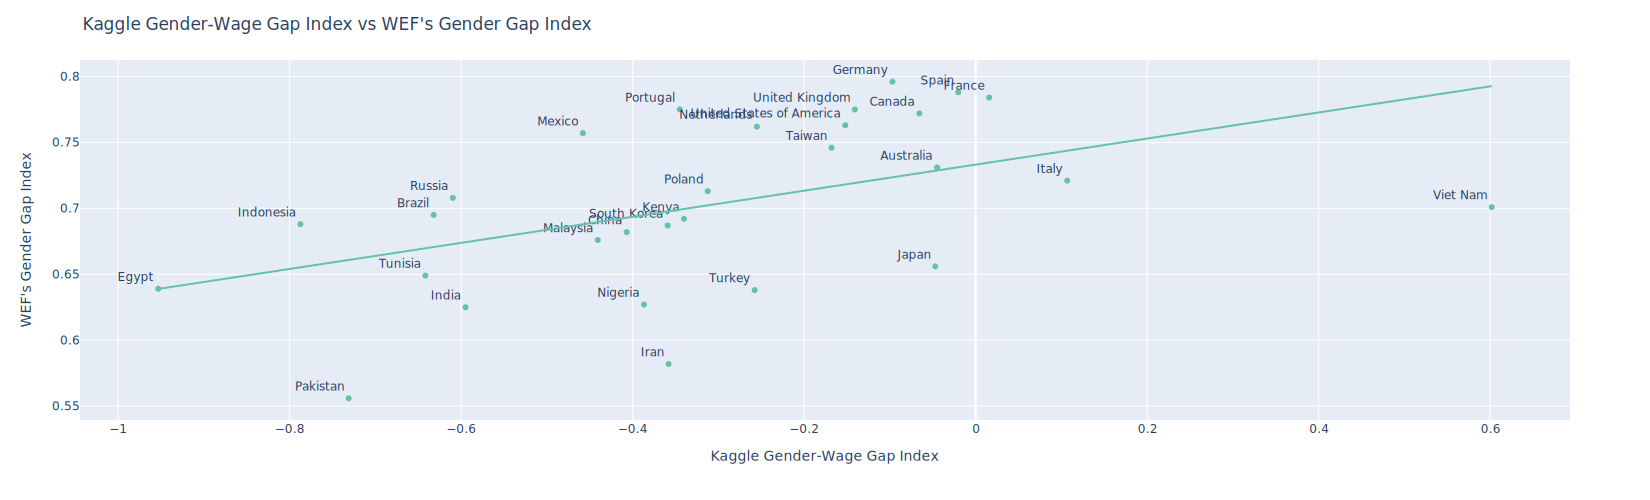

In [104]:
#@title
GGI = {'Indonesia':0.688,
       'South Korea':0.687,
       'Brazil':0.695,
       'India':0.625,
       'Portugal':0.775,
       'Poland':0.713,
       'Taiwan':0.746,
       'Egypt':0.639,
       'Viet Nam':0.701,
       'Netherlands':0.762,
       'Russia':0.708,
       'China':0.682,
       'Turkey':0.638,
       'Pakistan':0.556,
       'Germany':0.796,
       'United Kingdom':0.775,
       'United States of America':0.763,
       'Spain':0.788,
       'Japan':0.656,
       'Tunisia':0.649,
       'Canada':0.772,
       'France':0.784,
       'Australia':0.731,
       'Italy':0.721,
       'Kenya':0.692,
       'Malaysia':0.676,
       'Mexico':0.757,
       'Nigeria':0.627,
       'Iran':0.582
}

result['GGI'] = result.index.map(GGI)
result = result[result['GGI'].notna()]
result = result[['coef','GGI']]
palette = cycle(px.colors.qualitative.Pastel2)
fig = px.scatter(x=result['coef'], y=result['GGI'],color_discrete_sequence=px.colors.qualitative.Set2,text = result.index, trendline="ols")

fig.update_traces(textposition="top left")

fig.update_layout(
    title="Kaggle Gender-Wage Gap Index vs WEF's Gender Gap Index",
    xaxis_title="Kaggle Gender-Wage Gap Index",
    yaxis_title="WEF's Gender Gap Index",
)

fig.update_layout(
    width=1650,
    height=500,)
fig.show()

Finally, we compare the Kaggle Gender-Wage Gap Index with the World Economic Forum's Global Gender Gap Index. WEF's Index “ranks countries according to a calculated gender gap between women and men in four key areas: health, education, economy, and politics to gauge the state of gender equality in a country.” Therefore, this index is a comprehensive gender gap index while the Kaggle Index is specialized in the data science field with a sole focus on pay gap. The comparison is somewhat rough as the WEF index counts women’s educational attainment, political empowerment, and health and survival as weighted values while the Kaggle index only considers the economic part. But still it may give us some insights.


#Sub-Task 6: Mapping the Gender Pay Gap

In [119]:
#@title
df = pd.read_csv('cleaned_df2017.csv')
#to better perform regreesion, we drop countries which have fewer than 20 female respondents
country = pd.crosstab(df['Country'],df['Gender'])
country = country[country['Female'] >= 20].index
country = country.drop('Other')
df = df[df.Country.isin(country)]


In [120]:
#@title
#to get the adjusted wage by centering the wage to the median to reduce multicollinearity in a regression model
OUTLIER_MULTIPLE = 5
df['median_wage'] = df['Country'].map(df.groupby('Country')['CompensationAmount_mean'].median())
df['adj_wage'] = df['CompensationAmount_mean'] / df['median_wage']
df = df[df['adj_wage'] <= OUTLIER_MULTIPLE]
df = df[df['adj_wage'].notna()]
df = df.fillna(0)

#df = df.dropna()
TARGET = ['adj_wage']
EXPLANATORY = ['Gender'] #gender
CONTROL = ['Age_mean','LearningTime_mean','EmployerSize_mean','Education','Country','EmployerIndustry','JobTitle_Broad']

df['gender_country'] = df['Gender'] + df['Country']
by_country = pd.get_dummies(df['gender_country'])
by_country = by_country[[col for col in by_country.columns if 'Female' in col]]

y = df[TARGET]

#woman not by country
X_total = pd.concat([pd.get_dummies(df[EXPLANATORY + CONTROL],drop_first=True)],axis=1)

model = sm.OLS(y,sm.add_constant(X_total))
results = model.fit()
result_total = pd.concat([results.params,results.bse],axis=1)

result_total = pd.DataFrame(result_total).T
result_total#.columns = ['coef','se']
#result_total.index = ['Overall']

X = pd.concat([by_country,pd.get_dummies(df[CONTROL],drop_first=True)],axis=1)
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
#results.summary()

WOMAN_INDEX = [i for i in results.params.index if 'Female' in i]
result = pd.concat([results.params,results.bse],axis=1).loc[WOMAN_INDEX]

result.columns = ['coef','se']
result.index = [i.replace('Female','') for i in result.index]

result = pd.concat([result_total,result])
result = result.sort_values('coef')
result.drop(result.tail(2).index,inplace=True) 
result = result[['coef','se']]
result["year"] = 2017 
result = result.reset_index()
result2017 = result


In [121]:
#@title
df = pd.read_csv('cleaned_df2018.csv')
#to better perform regreesion, we drop countries which have fewer than 20 female respondents
country = pd.crosstab(df['Country'],df['Gender'])
country = country[country['Female'] >= 20].index
country = country.drop('Other')
df = df[df.Country.isin(country)]

In [122]:
#@title
OUTLIER_MULTIPLE = 5
df['median_wage'] = df['Country'].map(df.groupby('Country')['CompensationAmount_mean'].median())
df['adj_wage'] = df['CompensationAmount_mean'] / df['median_wage']
df = df[df['adj_wage'] <= OUTLIER_MULTIPLE]
df = df[df['adj_wage'].notna()]
df = df.fillna(0)

#df = df.dropna()
TARGET = ['adj_wage']
EXPLANATORY = ['Gender'] #gender
CONTROL = ['Age_mean','LearningTime_mean','EmployerIndustry','Education','Country','JobTitle_Broad']

df['gender_country'] = df['Gender'] + df['Country']
by_country = pd.get_dummies(df['gender_country'])
by_country = by_country[[col for col in by_country.columns if 'Female' in col]]

y = df[TARGET]

#woman not by country
X_total = pd.concat([pd.get_dummies(df[EXPLANATORY + CONTROL],drop_first=True)],axis=1)
X_total
model = sm.OLS(y,sm.add_constant(X_total))
results = model.fit()
result_total = pd.concat([results.params,results.bse],axis=1)

result_total = pd.DataFrame(result_total).T
result_total#.columns = ['coef','se']
#result_total.index = ['Overall']

X = pd.concat([by_country,pd.get_dummies(df[CONTROL],drop_first=True)],axis=1)
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
#results.summary()

WOMAN_INDEX = [i for i in results.params.index if 'Female' in i]
result = pd.concat([results.params,results.bse],axis=1).loc[WOMAN_INDEX]

result.columns = ['coef','se']
result.index = [i.replace('Female','') for i in result.index]

result = pd.concat([result_total,result])
result = result.sort_values('coef')
result.drop(result.tail(2).index,inplace=True)
result = result[['coef','se']]
result["year"] = 2018 
result = result.reset_index()
result2018 = result


In [123]:

#@title
df = pd.read_csv('cleaned_df2019.csv')
#to better perform regreesion, we drop countries which have fewer than 20 female respondents
country = pd.crosstab(df['Country'],df['Gender'])
country = country[country['Female'] >= 20].index
country = country.drop('Other')
df = df[df.Country.isin(country)]


In [124]:
#@title
OUTLIER_MULTIPLE = 5
df['median_wage'] = df['Country'].map(df.groupby('Country')['CompensationAmount_mean'].median())
df['adj_wage'] = df['CompensationAmount_mean'] / df['median_wage']
df = df[df['adj_wage'] <= OUTLIER_MULTIPLE]
df = df[df['adj_wage'].notna()]
df = df.fillna(0)
#df = df.dropna()
TARGET = ['adj_wage']
EXPLANATORY = ['Gender'] #gender
CONTROL = ['Age_mean','LearningTime_mean','EmployerSize_mean','Education','Country','JobTitle_Broad']

df['gender_country'] = df['Gender'] + df['Country']
by_country = pd.get_dummies(df['gender_country'])
by_country = by_country[[col for col in by_country.columns if 'Female' in col]]

y = df[TARGET]

#woman not by country
X_total = pd.concat([pd.get_dummies(df[EXPLANATORY + CONTROL],drop_first=True)],axis=1)

model = sm.OLS(y,sm.add_constant(X_total))
results = model.fit()
result_total = pd.concat([results.params,results.bse],axis=1)

result_total = pd.DataFrame(result_total).T
result_total#.columns = ['coef','se']
#result_total.index = ['Overall']

X = pd.concat([by_country,pd.get_dummies(df[CONTROL],drop_first=True)],axis=1)
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
#results.summary()

WOMAN_INDEX = [i for i in results.params.index if 'Female' in i]
result = pd.concat([results.params,results.bse],axis=1).loc[WOMAN_INDEX]

result.columns = ['coef','se']
result.index = [i.replace('Female','') for i in result.index]

result = pd.concat([result_total,result])
result = result.sort_values('coef')
result.drop(result.tail(2).index,inplace=True)
result = result[['coef','se']]
result["year"] = 2019 
result = result.reset_index()
result2019 = result


In [125]:
#@title
df = pd.read_csv('cleaned_df2020.csv')
#to better perform regreesion, we drop countries which have fewer than 20 female respondents
country = pd.crosstab(df['Country'],df['Gender'])
country = country[country['Female'] >= 20].index
country = country.drop('Other')
df = df[df.Country.isin(country)]


In [126]:
#@title
#to get the adjusted wage by centering the wage to the median to reduce multicollinearity in a regression model
OUTLIER_MULTIPLE = 5
df['median_wage'] = df['Country'].map(df.groupby('Country')['CompensationAmount_mean'].median())
df['adj_wage'] = df['CompensationAmount_mean'] / df['median_wage']
df = df[df['adj_wage'] <= OUTLIER_MULTIPLE]
df = df[df['adj_wage'].notna()]
#df = df.dropna()
TARGET = ['adj_wage']
EXPLANATORY = ['Gender'] #gender
CONTROL = ['Age_mean','LearningTime_mean','EmployerSize_mean','Education','Country','JobTitle_Broad']

df['gender_country'] = df['Gender'] + df['Country']
by_country = pd.get_dummies(df['gender_country'])
by_country = by_country[[col for col in by_country.columns if 'Female' in col]]

y = df[TARGET]

#woman not by country
X_total = pd.concat([pd.get_dummies(df[EXPLANATORY + CONTROL],drop_first=True)],axis=1)

model = sm.OLS(y,sm.add_constant(X_total))
results = model.fit()
result_total = pd.concat([results.params,results.bse],axis=1)

result_total = pd.DataFrame(result_total).T
result_total#.columns = ['coef','se']
#result_total.index = ['Overall']

X = pd.concat([by_country,pd.get_dummies(df[CONTROL],drop_first=True)],axis=1)
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
#results.summary()

WOMAN_INDEX = [i for i in results.params.index if 'Female' in i]
result = pd.concat([results.params,results.bse],axis=1).loc[WOMAN_INDEX]

result.columns = ['coef','se']
result.index = [i.replace('Female','') for i in result.index]

result = pd.concat([result_total,result])
result = result.sort_values('coef')
result.drop(result.tail(2).index,inplace=True)
result = result[['coef','se']]
result["year"] = 2020 
result = result.reset_index()
result2020 = result

In [127]:
#@title
map = result2017.append([result2018,result2019,result2020,result2021])
map = map.rename(columns = {"index":"country"})

In [128]:
#@title
iso = {'Malaysia':'MYS',
       'Indonesia':'IDN', 
       'Philippines':'PHL',
       'Turkey':'TUR',
       'Pakistan':'PAK',
       'Russia':'RUS',
       'China':'CHN',
       'India':'IND',
       'Ukraine':'UKR', 
       'Brazil':'BRA',
       'Ireland':'IRL',
       'South Korea':'KOR',
       'Italy':'ITA', 
       'Netherlands':'NLD',
       'Spain':'ESP', 
       'South Africa':'ZAF',
       'Taiwan':'TWN',
       'France':'FRA',
       'Singapore':'SGP',
       'Canada':'CAN',
       'Australia':'AUS',
       'United States of America':'USA',
       'United Kingdom':'UK',
       'Germany':'DEU',
       'Poland':'POL',
       'Japan':'JPN',
       'Mexico':'MEX',
       'Israel':'ISR',
       'Nigeria':'NGA',
       'Morocco':'MAR',
       'Portugal':'PRT',
       'Thailand':'THA',
       'Iran':'Iran',
       'Egypt':'EGY',
       'Tunisia':'TUN',
       'Kenya':'KEN',
       'Viet Nam':'VNM'}

In [129]:
#@title
code = pd.DataFrame(iso.items(), columns=['country', 'iso_code'])
map = map.merge(code, on='country')

map = map.sort_values(by=['year'])

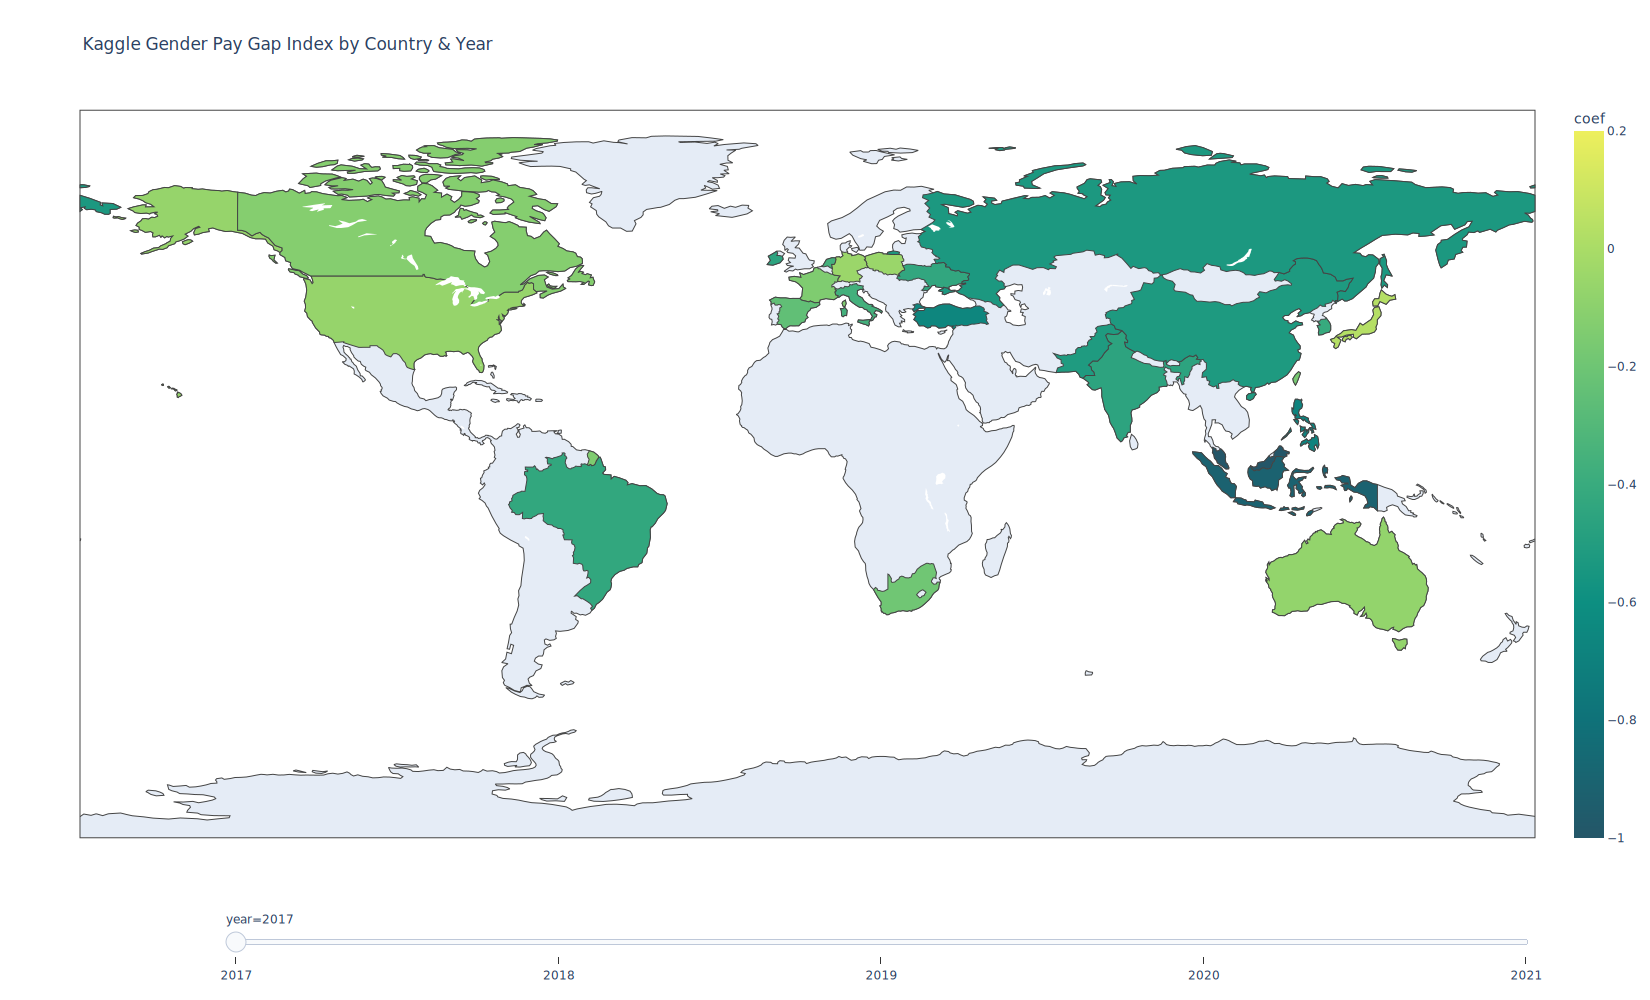

In [136]:
#@title
fig = px.choropleth(map, locations="iso_code",
                    color="coef",
                    hover_name="country",
                    animation_frame="year",
                    title = "Kaggle Gender Pay Gap Index by Country & Year",                 
                    color_continuous_scale=px.colors.sequential.Aggrnyl,
                    range_color=(-1,0.2))
 
fig["layout"].pop("updatemenus")
fig.update_layout(
    title=go.layout.Title(
        text="Kaggle Gender Pay Gap Index by Country & Year <br><sup>The darker the color, the worse the gender pay gap. The gap is getting bigger from 2017 to 2021.</sup>"))
fig.update_layout(
    width=1650,
    height=1000,)
fig.show()